Son değiştirilme tarihi:**31.10.2024**



# Ön ayarlar ve kurulumlar

Şu uyarıyı durdurmak için ipython downgrade ediorum, umarım ilerde buna gerek kalmaz:

> DeprecationWarning: should_run_async will not call transform_cell automatically in the future. Please pass the result to transformed_cell argument and any exception that happen during thetransform in preprocessing_exc_tuple in IPython 7.17 and above.

In [ ]:
!pip -q install ipython==7.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.1/785.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigquery-magics 0.4.0 requires ipython>=7.23.1, but you have ipython 7.16.1 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 7.16.1 which is incompatible.


In [ ]:
# Bir de içinde birsürü **frozen** geçen satır çıkıyor, bunlar çıkmasın diye uzaya gönderiyoruz
import sys
import os

# Redirect stderr to /dev/null to suppress warnings
sys.stderr = open(os.devnull, 'w')

# sonra geri açmak için
# sys.stderr = sys.__stderr__

Bu notebooktan tam verim almak için <a href="https://nbviewer.org/github/VolkiTheDreamer/PythonRocks/blob/master/Machine%20Learning/Supervised/E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML notebookuyla</a> birlikte incelenmesini öneriyorum. Ve ayrıca <a href="https://github.com/VolkiTheDreamer/PythonRocks/tree/master/mypyextj">kendi modüllerimden oluşan paketimi</a> de indirmeniz gerekmektedir. Bunun sebebi, sizi gereksiz kod kalabalığı ile yormak istemeyip dikkatinizi sadece buradaki ana konuya toplamaktır. Kodları isterseniz ayrıca inceleyebilirsiniz. İndirmek için şu adresi kullanın: https://minhaskamal.github.io/DownGit/#/home.

Ayrıca sık sık <a href="Linear%20Regression.ipynb">Lineer Regresyon</a> notebookuma da referansta bulunacağım.

In [ ]:
#Önce bu
from google.colab import drive
drive.mount("/content/drive/")

#sonra da bu:benim custom paketin olduğu folder'ı nereye koyduysanız onu path'e ekliyoruz
import sys
sys.path.insert(0,'/content/drive/MyDrive/Programming/PythonRocks/')

Mounted at /content/drive/


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip -q install ipython-autotime
%load_ext autotime

time: 853 µs (started: 2024-10-26 13:17:50 +00:00)


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

time: 780 µs (started: 2024-10-26 13:17:50 +00:00)


In [ ]:
# prompt: i will work with pandas-flavor and forbiddenfruit librarries. which version of numpy and pandas should i install

# !pip -q install numpy==1.21.6 --force-reinstall
# !pip -q install pandas==1.5.0 --force-reinstall
# !pip -q install pandas-flavor
# !pip -q install forbiddenfruit

time: 536 µs (started: 2024-10-26 13:17:50 +00:00)


In [ ]:
import numpy as np
import pandas as pd
np.__version__
pd.__version__

'1.26.4'

'2.2.2'

time: 501 ms (started: 2024-10-26 13:17:50 +00:00)


In [ ]:
# !pip -q install -U numpy pandas matplotlib seaborn

time: 529 µs (started: 2024-10-26 13:17:51 +00:00)


# Gerekli kütüphanelerin import edilmesi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mypyext import dataanalysis as da

all warnings will be shown
time: 3.58 s (started: 2024-10-26 13:17:51 +00:00)


In [ ]:
#preprocessors, hepsini kullanmayabiliriz, ben nolur nolmaz diye hepsini topluca import ediyorum
from mypyext import ml
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedKFold,RepeatedKFold,RepeatedStratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold,SelectKBest, chi2, f_classif, mutual_info_classif,RFE,RFECV

time: 4.76 s (started: 2024-10-26 13:17:54 +00:00)


# Şablon

Algoritmaları anlatırken aşağıdaki şablona göre gitmeye çalışacağım:

- **Teori**:
    - Algoritmanın kısa tanımı ve nasıl çalıştığı
    - Çözülmeye çalışılan problemin detayı
    - Manuel implementasyon: Hazır kütüphane olmadan kendimiz nasıl kodlardık(Bu her zaman bulunmayabilir)    
    - Varsayımlar/Ön kontroller: Bu algoritmayı kullanmak için hangi şartların sağlanması gerekir
    - Önemli hususlar: bunun içinde algoritmanın nelere duyarlı olduğu, özellikle nelere dikkat edilmesi gerektiği ve (hyper)parametrelerde özellikle dikkat edilmesi gereken hususlar olacak. Ayrıca alogritmanın özellikle iyi olduğu alanlar varsa bunlara da bu başlıkta değineceğiz
    
- **Kod pratiği/Örnekler**: Konuyu pekişitrmek adına bir veya birkaç örnek. Konular ilerledikçe örnek sayısı azalabilir. Sırayala okunacağını düşünerek konununu pekişmesi adına ilk başlarda daha fazla örnek olabilir.
- **Kaynaklar**: En sonda toplu olarak bulunmakla birlikte, yer yer aralarda da gerektiği durumlarda linkler verilecektir.

# Teori

##  Nedir? Nasıl çalışıyor? Nerde/Niçin kullanılır?

Logistic Regresion(LogReg), bir sampleın hangi sınıfa/labela ait olduğunu tahmin etmeye çalışan, en temel algoritmalardan bir tanesidir. Bunu, lineer regresyondaki(LinReg)'nin aksine lineer bir fonksiyonla değil de, **non-lineer **bir fonksiyon olan **logit** fonksiyonu kullanarak hesaplar.

LogReg tanıtılırken çoğunlukla şöyle anlatılır: *LogReg, adında Regression geçmesine rağmen bir regresyon algoritması değildir, classification algoritmasıdır*. Sonra başkaları bunu düzeltir ve der ki *Hayır, aslında bu lineer bir modeldir, zaten sklearn içinde de linear_model modülü içinde yer alır*. Evet, doğrudur, bu bir lineer modeldir, tıpkı LinReg'da olduğu gibi betalar yani katsayılar vardır ve lineer bir desicion boundary'si vardır. Devam edelim; Sonra başka bir kaynak der ki, *Evet her ne kadar arka planda bu bir lineer modelse de, sonuçta bir classification algoritmasıdır.*

Hadi bu karmaşaya bi son verelim. **Bu algoritmanın yaptığı, bir veri setindeki kayıtları sınıflandırmak değil, bunların belirli bir sınıfa ait olma olasılığını bulmaktır**; sınıflandırma kısmı biz son kullanıcılara kalır. Belirlediğimiz thresholda göre sınıfı biz belirlemiş oluruz. Özetle LogReg, `classification(sınıflandırma) amaçlı kullanılan linear bir modeldir ve özünde bir regresyon algoritmasıdır.` <a href="https://towardsdatascience.com/how-are-logistic-regression-ordinary-least-squares-regression-related-1deab32d79f5">Şuraya</a> da bi bakın derim.

Logistic kelimesi `logit` fonksiyonundan geliyor, bildiğimiz lojistikle(taşımacılık, mal temini v.s) bi alakası yok. Bu model de <a href="Linear Regression.ipynb">LinReg</a> gibi inputların ağırlıklarını hesaplar, ancak bunları doğrudan çıktı olarak vermek yerine bunları bu logit fonksiyonuna göndererek 0-1 arasında bir olasılık hesaplatır. Olasılıkları doğrudan kullanmak yerine log'unun kullanılması bir olayın olma olasılığı ile olmama olasılığı arasında simetri yakalama amacıyladır. Aşağıdaki videolardan birinde bunu daha iyi anlayacaksınız. Ben de biraz aşağıda bu konulara değineceğim.

LogReg, en temel algoritmalardan biri olup, aynı zamanda çoğu durumda ilk başta denenmesi gerekenlerdendir. Birçok kullanım alanı olmakla birlikte tipik olarak "mail spam mi değil mi", "bu hücre kanser hücresi mi değil mi", "bu işlem fraud işlemi mi değil mi" gibi binary classification(yani 1/0, True/False, Yes/No) problemlerinde kullanılır, bununla birlikte multi-class classification da yapılabilmektedir.

Evet şimdi tanımlarda biraz daha derine inmeden, aşağıdaki videoları izleyelim, ama mutlaka izleyelim.

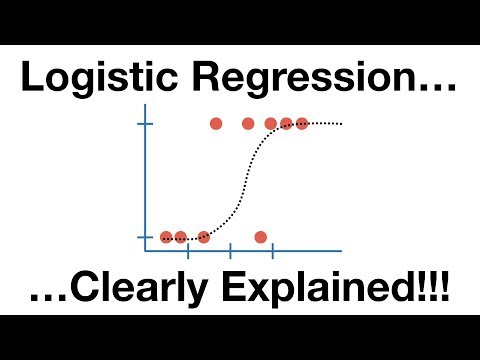

time: 64.3 ms (started: 2024-10-26 13:17:59 +00:00)


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8')
# YouTubeVideo('ARfXDSkQf1Y')
# YouTubeVideo('8nm0G-1uJzA')
# YouTubeVideo('vN5cNN2-HWE')
# YouTubeVideo('BfKanl1aSG0')
# YouTubeVideo('xxFYro8QuXA')

DİKKAT: Dedik ki, bu algoritma sadece bir olasılık hesaplar. Sklearn default olarak bu olasılık %50 üzerindeyse bir instanceı ilgili sınıfa sokar. Ama bu çok doğru bi yaklaşım değildir. Başka sık yapılan bir hata da threshold olarak prior probability kullanmak, yani bir sınıfın toplam küme içindeki oranını kullanmaktır, ki bu da çok doğru bi yaklaşım değildir. Burda thresholdu iş problemine göre kendimiz belirlemeliyiz. Bunla ilgili detay açıklamaları ve örneği <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan Uca ML projesi notebookunda</a> bulabilirsiniz.

## Çözülecek problem

Burdaki soru şudur: Elimizdeki prediktörleri kullanarak bir instance'ın hangi sınıfta olma olasılığını modelleyebilir miyiz?

Logistic Regression'da bu soruya vereceğimiz cevap bizi Deep Learning'i(DL) de anlamaya yaklaştırackatır. Göreceksiniz, LogReg'in mantığı DL'in mantığına ne kadar benziyor. Zira burada da elimizdeki feature değerlerini bir aktivasyon fonksiyonuna(sigmoid) sokma var, DL'de de; keza burda da optimizasyon yöntemi olarak Gradient Descent kullanılıyor, DL'de de. DL ile ilgilenmeyi düşünüyorsanız LogReg'i ve onun temelinde yer alan logit/sigmoid fonksiyonlarını, cost functionları ve gradient descent'i anlamak çok önemli.

### Logit ve sigmoid fonksiyonları

Şimdi, x'leri kullanarak bir Y olayı olur mu bunun olaslığını bulmak istiyoruz. İlk olarak klasik LinReg benzeri bir eşitlikle ilerlemeyi deneyelim.

$$P(Y=1|X)= p=\beta_0 + \beta_1x$$

Burda bi sıkıntı var, zira eşitliğin sağ tarafı herhangi bi değer(-inf ile +inf arasında) alabilir, halbuki bize pozitif bi değer lazım, zira olasılık denen şey pozitif bir değerdir. O zaman yukarıdaki gibi değil de exponansiyel bir denklem mi arasak?, $e^{\beta_0+\beta_1x}$ gibi(başka bir şekilde de temisil edilebilirdi ancak bu ve arkadan gelecek olan logit & sigmoid fonksiyonları endüstri standartı olmuştur). Bunu **odds**(birşeyin olma olasılığı/olmama olasılığı) olarak düşünelim. Bu işimizi görür sanki ama bunda da bir sıkıntı var, ki bu da artı sonsuza kadar gidiyor, bize 0-1 arası değer lazım. O zaman oddstan olasığa geçebiliriz.

Odss şöyle hesaplanır:<br><br>

$$\large odds=\frac{\text{bir olayın olma olasılığı}}{\text{bir olayın olmama olasılığı}}=\frac{P(Y=1)}{P(Y=0)}=\frac{p}{1-p}$$

Eşitlikte p yerine $e^{\beta_0+\beta_1x}$ koyup p'yi yalnız bıraktığımızda şu sonucu elde ederiz.

$$\large p=\frac{e^{\beta_0+\beta_1.x}}{1+e^{\beta_0+\beta_1.x}}$$

Bunun bir başka gösterim şekli de(gerekli matematiği işletince):

$$\large p=\frac{1}{1+e^{-(\beta_0+\beta_1.x)}}$$

Artık hem pozitif hem 0-1 arası değerlere sahibiz.

Şimdi örnek probabilityler(p) üzerinden gidelim.

In [ ]:
p=np.array([0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 0.9999, 1]) #eventin olma olasılığı
notp=np.array(p[::-1]) #eventin olmama olasılığı
odds=p/notp

time: 2.03 ms (started: 2024-10-26 13:17:59 +00:00)


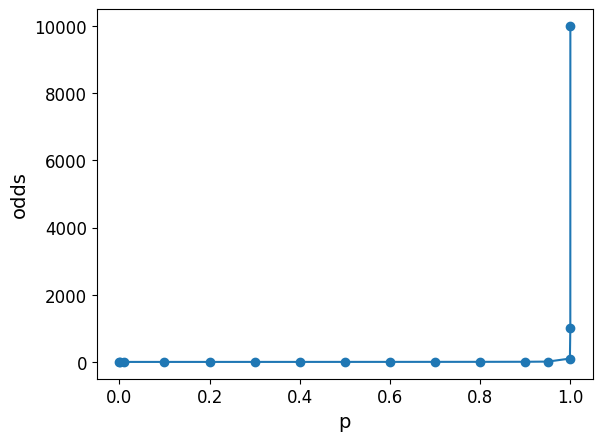

time: 435 ms (started: 2024-10-26 13:17:59 +00:00)


In [ ]:
plt.plot(p,odds,"o-")
plt.xlabel("p")
plt.ylabel("odds");

Burda olayın olma olasılığı arttıkça odds ratio'nun da astronomik seviyelere çıktığını görüyoruz. Yani bir asimetriklik var. Bunu düzeltmek lazım. Nasıl? İki tarafın da log'unu alarak. odds'un logunu aldığımızda karşımıza çıkan fonksiyon `logit fonksiyonu` oluyor işte. Bu sayede karşımızda çıkan katsayıların yorumlanması daha kolay olacaktır, zira artık elimizde lineer bir denklem vardır.

$$\large odds=\frac{p}{1-p} \;\;\;\;\;\text{-----log alalım---->}\;\;\;\;\; ln(odds)=ln(\frac{p}{1-p}) = ln(e^{\beta_0+\beta_1x})=\beta_0+\beta_1x$$

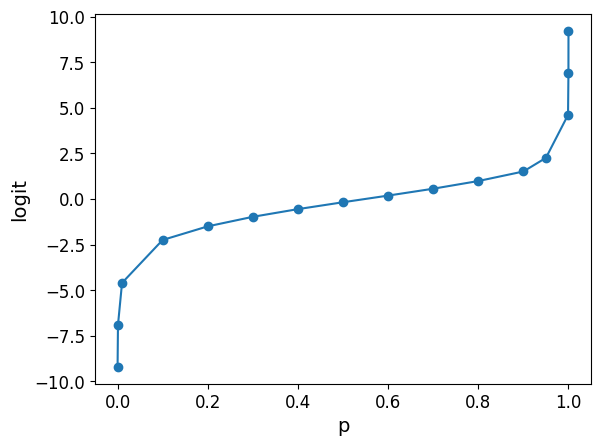

time: 355 ms (started: 2024-10-26 13:18:00 +00:00)


In [ ]:
logit=np.log(odds)
plt.plot(p,logit,"o-")
plt.xlabel("p")
plt.ylabel("logit");

Artık elimizde lineer bir denklem var. X, 1 birim arttıkça Y'nin logiti $\beta_1$ kadar değişir, başak bir değişle odss $e^{\beta_1}$ kadar artar.

Şimdi son olarak sınıf olasılıklarını bulmak için bu logit fonksiyonun da aşağıdaki gibi tersi alınır, ki buna da `sigmoid function` denir. Burda x ve y arasındaki ilişki non-lineer olmuştur.

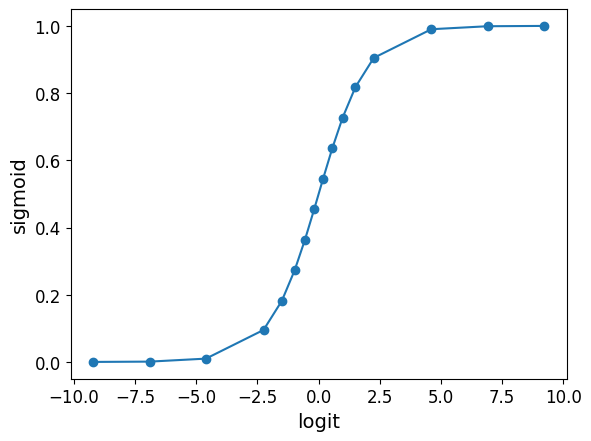

time: 351 ms (started: 2024-10-26 13:18:00 +00:00)


In [ ]:
sigmoid=1/(1+np.exp(-logit))
plt.plot(logit,sigmoid,"o-")
plt.xlabel("logit")
plt.ylabel("sigmoid");

Şimdi $\beta_0+\beta_1x$ denklemimizi düşündüğümüzde burdaki betaları nasıl bulacağız? Esas **çözülecek problem** budur. En küçük kareler yöntemini(OLS) kullanamayız, çünkü ilişki lineer değil. Bu sefer `Maximum Likelihood Estimation(MLE)` metodunu kullanacağız ve bunu maksimize eden katsayıları bulmaya çalışacağız. Yani karşımızda yine bir optimizasyon görevi var.

Şimdi hesapları yapalım:

$$\large P(Y=1\;|\;x)= \frac{1}{1+e^{-(\beta_0+\beta_1x)}} = F_\beta(x)$$
<br>

$$\large P(Y=0\;|\;x)= 1 - F_\beta(x)$$

<p>Tek bir instance(gözlem) için likelihood tahmini genelleştirilmiş haliyle şöyle olur</p><br>

$$\large P(Y=y\;|\;x)= [F_\beta(x)]^y.[1-F_\beta(x)]^{1-y}$$

Burda y'ler gerçek değerler iken $F_\beta$'lar tahmini değerlerdir. Tüm instanceler için bu olasılıklar aşağıdaki gibi çarpılır ve nihai Likelihood fonksiyonu elde edilir.<br>

$$\large  L = \prod_{i=1}^N[F_\beta(x)]^{y_i}.[1-F_\beta(x)]^{1-{y_i}}$$

Bu çarpım işlemi, işleri karmaşıklaştırır, üstelik bilgisayar belleği için de yüktür. Biz yine her iki tarafın logunu alalım, o yüzden fonksiyonumuzun adı artık Likelihood değil `Log Likelihood` olur. Log aldığımızda neler olacağını bi hatırlayalım,

$$log(a^b)=b.log(a)\;\; ve \;\;log(a.b)= log(a)+log(b)$$

ve sonuç

$$\large  log(L) = LL = \sum_{i=1}^N[{y_i}.log(F_\beta(x)^i) + (1-{y_i).log(1-F_\beta(x)^i)]}$$

veya

$$\large  LL = \sum_{i=1}^N[{y_i}.log(p_i) + (1-{y_i).log(1-p_i)]}$$


Bu nihai fonksiyona **cross entropy** adı verildiğini de görebilirsiniz. Denklemden görüldüğü üzere, gerçek sınıf 1 iken eşitliğin ikinci kısmı uçuyor, 0 iken de ilk kısmı. Bu denklemin bir güzelliği de, yanlış tahmini ne kadar kendinden emin bi şekilde yaparsak(yani olasılığımız ile gerçeklik arasındaki fark ne kadar çok açıksa) bunun daha fazla cezalandırılmasıdır. Mesela aşağıdaki örneğe bakalım,



In [ ]:
prd=[0.99, 0.99, 0.01, 0.01] #tahmin olasılıkları
act=[1, 0, 1, 0] #gerçek değerler

for i in range(len(act)):
    logloss=-(act[i]*np.log(prd[i])+(1-act[i])*np.log(1-prd[i]))
    normalloss=np.abs(act[i]-prd[i])
    print(f"actual:{act[i]}, True olasılığı:{prd[i]:.2f}, logloss:{logloss:.2f}, normalloss:{normalloss:.2f}")

actual:1, True olasılığı:0.99, logloss:0.01, normalloss:0.01
actual:0, True olasılığı:0.99, logloss:4.61, normalloss:0.99
actual:1, True olasılığı:0.01, logloss:4.61, normalloss:0.99
actual:0, True olasılığı:0.01, logloss:0.01, normalloss:0.01
time: 4.64 ms (started: 2024-10-26 13:18:01 +00:00)



Bunun binary case için özel hali ise **binary cross entropy** olup aşağıdaki gibidir.

$$\large  LL = \sum_{i=1}^N{y_i}.log(p_i)$$

Bir adımımız daha kaldı o da, maximize edilmeye çalışılan bu fonksiyonu minimize etmeye çalışmak. Bunun için de başına bir "-" konur.

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Nihai fonksiyonumuz negatif işaretlidir, bu artık bir **cost function** olmuştur. **iterasyon** ile bu maliyet fonksiyonunu minimize etmeye çalışacağız. Bunun için de `Gradiend Descent(GD), Stokastik GD, Newton metodu` gibi metodlar var. Biz burada GD'ye bakacağız.

Şimdi öncelikle GD öncesine kadarki olan kısmı, yani yukarıda anlattıklarımızı bir de şematik olarak görelim.

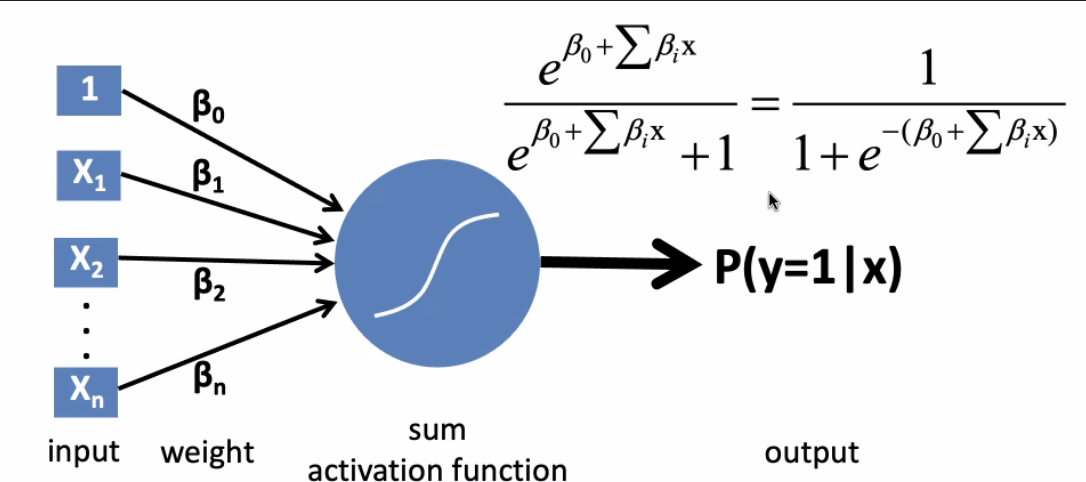
<p style="font-size:smaller;text-align:center">Görsel: H.S Ölmez - Sabanci University</p>

Veya Kaggle master Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression">gösterdiği</a> gibi beta yerine weight anlamında w'ler de kullanılabilir, ki bu şematik gösterim Neural Networks(Sinir Ağları/Derin Öğrenme) anlatımında da karşımıza çıkacak.

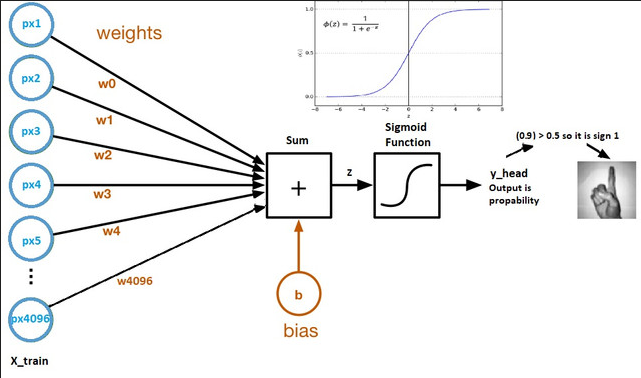

### Gradient Descent

Bunu LinReg notebookunda görmüştük, oraya tekrar bakabilirsiniz. Regresyon değil de classification bağlamında görmek için Kaan hocamızın yine yukarıdaki linkine bakabilirsiniz. Bunlara ek olarak aşağıdaki linklerden de gerek GD detayını gerek manuel implementasyonu görebilirsiniz.

- https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060
- https://realpython.com/logistic-regression-python/

"Bana kısaca sen anlat" diyenler için şöyle özetleyeyim.

- Öncelikle "katsayıların ilk değerlerine ne verelim" sorusuyla başlanır. Bunun için bazı teknikler var, diyelim ki 0.01 verdik ve $\beta_0$(bias) için de 0 dedik.(Not: Neural Networklerdekinin aksine LogReg'de ağırlıklar 0 verilerek başlatılabilir)
- x'ler ile betalar(weightler) çarpılır ve toplanır. Çıkan sonuç, bir aktivasyon fonksiyonu olan sigmoid fonksiyonuna sokulur. Diyelim ki eğitim setinde bir instance'ın classını 0(not-churn/not-spam v.s) tahminledik ve gerçekten de 0'mış(veya 1 dedik ve gerçekten 1 çıktı), o zaman kaybımız(`loss`) 0'dır. Bu işlemin, yani tahminle gerçek değer arasındaki farkın hesaplanma sürecinin, adı **forward propagation**'dır.
- Tüm instancelar için bu loss'ların toplamına da `cost` deniyor. Nihai amaç, cost'un minimize olması.
- Sonra başa dönüp betalar ve bias güncellenir, ki buna da **backward propagation** denir. Güncelleme işlemi de türev alarak gradient descent yöntemiyle yapıyoruz, ta ki eğim(yani türev) 0 olana kadar.

### Cost function olarak LogLoss(binary cross entropi)

Cost functionımız yukarıdaki negatif log-likelihood veya diğer adıyla binary cross entropi fonksiyonudur. Buna negative log loss da denmektedir. Yukarıda bahsedilen tüm proses boyunca bu metrik minimize edilmeye çalışılır.

$$\large  Negatif Log Likelihood = NLL = -\sum_{i=1}^N{y_i}.log(p_i)$$

Aşağıda daha detaylı bilgiler edinebilrsiniz ancak özet olarak şunu söyleyebiliriz. Regresyon analizlerinden genelde SSE(Sum of Squared Errors), classficationda ise Log Loss/CrossEntropy Loss optimize edilmeye çalışılır. Tabi classficationda classlara farklı ağırlıklar vererek bu cost functionları modifiye etmek de mümkündür. Bunun nasıl yapıldığını <a href="E2E_Classification_ML_Main_Concepts_Part_II.ipynb">Uçtan uca ML projesinde</a> görebilirsiniz.

Bu konu da önemli bir konu olup ilave okumalar yapmanızı öneririm

- https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81
- https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23
- https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
- https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/
- https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
- https://www.data4v.com/log-loss-as-a-performance-metric/
- https://medium.com/konvergen/cross-entropy-and-maximum-likelihood-estimation-58942b52517a
- https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f
- https://algorithmia.com/blog/introduction-to-loss-functions
- https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb
- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
- http://www.awebb.info/probability/2017/05/18/cross-entropy-and-log-likelihood.html

Son olarak şunu da söylemekte fayda var. GridSearch içinde de scoring parametresine de accuracy/precision gibi metriclere ek olarak **neg_log_loss** da verebiliyoruz. Yani neg_log_loss hem Logistic Regresyonunu optimize etmeye çalıştığı bir **fonksiyondur** hem de bir **evaluation metriğidir**. Daha detay bilgi için <a href="E2E_Classification_ML_Main_Concepts_Part_I.ipynb">Uçtan uca ML projesi(PartI)</a> içinde GridSearch bölümündeki Önmeli Husulara bakabilirsiniz.

## Manuel Implementasyon

Manuel implementasyonu Kaan hocamızın <a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Logistic-Regression"> Kaggle sayfasında</a> bulabilirsiniz.

## Varsayımlar

- LinReg'in aksine Residual'ların normal dağılımı ve homoscdedasticity gerekmez
- LinReg'in aksine prediktör ve target arasında Lineer ilişki gerekmez
- LinReg'de olduğu gibi featurelar arasında multicollinearity, featureların  öneminin yorumlanmasında sorun teşkil edebilir
- LinReg'de olduğu gibi instanceların birbirinden bağımsız olması beklenir
- LinReg'de olduğu gibi featureler arasında collinearity olmaması gerekir(Tahmin sonucunu değiştirmez, ama featureların önemini yorumlamada önemlidir)--> bunla ilgili kaynaklara <a href="Linear Regression.ipynb">LinReg</a> notebookundan bakabilirsiniz.
- Instance sayısı feature sayısının en az 10-15 katı olmalıdır

## Önemli husular

**Genel**
- Çok kritik bi detay değil ama mülakatlarda çıkabilir diye tekrar belirtmekte fayda var: Sınıflandırma algoritması değildir, sınıflandırmada kullanılan lineer regresyon algoritma türüdür
- fit çizgisi S şeklindedir, ama decision boundry lineerdir
- Maximum Likelihood(MLE) maximize edilmeye çalışılır(veya negative log likelihood cost function minimize edilemesi)
- Target'ı LabelEncode etmeye gerek yoktur
- Data linearly separable durumdaysa, MLE fonksiyonu sınıflar arasındaki ayrımı ortaya koymak için katsayıların gittikçe büyümesine neden olur. Bunu önlemek için **Penalty** kullanmak gerekir. Bu regülarizasyon cezasının seviyesini belirlemek için de lambda(sklearn'de bunun tersi olan "C" var) değeri kullanılır. Daha yüksek lambda(yani daha düşük C), daha güçlü regülarizasyon demektir. Bu değer, deneme yanılmayla optimize edilir.
- defaultu binary classfication içindir ama multi_class parametresi **multinomial** yapılarak multi-class tahminleme yapılabilir.
- **SGDClassfication**: SGD, genel olarak bir optimizasyon yöntemidir. Bu anlamda, SGDClassifer da, regularizasyon içeren bir linear modelin SGD(Stochastic Gradient Descent) ile optimize edilmiş halidir. sklearn'de LogReg için böyle bir classifer var: SGDClassifier(alpha=k, penalty='l2', loss='log')


**Avantajlar**
- computation comlexity:O(nd), hızlı eğitilir.
- online/realtime kullanımı vardır.
- Interpretability'si yüksektir(katsayılar aracılığıyla)

**Dezavantajlar**
- İyi bir optimizasyon elde etmek için yüksek  sayıda veriye ihtiyaç duyar, az veride başarılı olmayabilir
- Outlierlara karşı duyarlıdır, dikkatlice ele alınması gerekir.
- Scaling'e duyarlıdır(Tahmin sonucunu değiştirmez, yorumlamada önemli)
- lineer decision boundry'si vardır. linearly sperable olmayan datalarda, ki çoğunlukla öyle olacaktır, performansı düşüktür. O yüzden de diğer algoritmalara göre genelde daha düşük bir accuracy vardır. Çoğunlukla ana model olmak yerine baseline/benchmark model olarak seçilir.

# Kod Pratiği

## Data temini, analizi(EDA) ve preprocessing

Titanic verisetini inceleyeceğiz, bu birçok eğitimde anlatılan bir veri setidir, ve <a href="https://www.kaggle.com/competitions/titanic/overview">Kaggle'da</a> da bulunmaktadır.

Çeşitli bilgileri verilen yolcuların hayatta kalıp kalmadığı bilgisi var. Bu bilgileri kullnarak bir model oluşturacağız ve yeni gelen veri setindeki bir kişinin hayatta kalıp kalmadığını tahmin etmeye çalışacağız.

**Önemli not**: İki ayrı veri seti verilmiş durumda. train ve test diye. Böyle iki parça halinde verilen setlerde genelde test setinde label olmaz, ve bunu bizim tahmin etmemiz, sonra da sonuçları bir yere yüklememiz istenir. Gerçek değerleri biz bilmeyiz, onlar bu verisetini yaratanların elindedir. Bu örnekte de durum böyle. Bu durum biraz kafanızı karıştırabilir. Şöyle yapalım, burdaki test setini saha verisi olarak düşünün. Biz okuyacağımız train verisini ise elimizdeki ana veri gibi düşünüp, onu yine kendi içinde train ve teste ayıracağız.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/VolkiTheDreamer/dataset/master/Classification/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


time: 279 ms (started: 2024-10-26 13:18:01 +00:00)


Survived kolonu bizim target kolonumuz,binary classification olacak. Kolonlarda şunlar açıklamaya ihtiyaç duyuyor, diğerleri zaten aşikar:

- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
df.shape

(891, 12)

time: 4.11 ms (started: 2024-10-26 13:18:01 +00:00)


## EDA

### Genel

In [ ]:
#mypyext paketimideki extensions modülündeki fonksiyon versiyon sorunları yaşadaığı için buraya elle yazdım
def super_info_(df, dropna=False):
    dt=pd.DataFrame(df.dtypes, columns=["Type"])
    dn=pd.DataFrame(df.nunique(dropna=dropna), columns=["Nunique(Excl.Nulls)"])
    nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT=df.head(1).T.rename(columns={0:"First"})
    MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] if not df[x].isnull().all() else None for x in df.columns], columns=["MostFreqItem"],index=df.columns)
    MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] if not df[x].isnull().all() else None for x in df.columns], columns=["MostFreqCount"],index=df.columns)
    return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

super_info_(df)

,Type,Nunique(Excl.Nulls),#of Missing,MostFreqItem,MostFreqCount,First
PassengerId,int64,891,0,1,1,1
Survived,int64,2,0,0,549,0
Pclass,int64,3,0,3,491,3
Name,object,891,0,"Braund, Mr. Owen Harris",1,"Braund, Mr. Owen Harris"
Sex,object,2,0,male,577,male
Age,float64,89,177,24.0,30,22.0
SibSp,int64,7,0,0,608,1
Parch,int64,7,0,0,678,0
Ticket,object,681,0,347082,7,A/5 21171
Fare,float64,248,0,8.05,43,7.25


time: 45.1 ms (started: 2024-10-26 13:18:01 +00:00)


ilk gözlemlerimiz:

- null kolonlar var
- düşük ve yüksek <a href="https://en.wikipedia.org/wiki/Cardinality">kardinalitesi</a> olan kolonlar var
- full cardinalitesi olan 2 kolon var(id ve name), bunları sileriz(Belki Name'den Mr/Mrs gibi ünvanları da alabiliriz ama şuan buna odaklanmayalım)
- Ticket bilgisi anlamsız bi bilgi gibi duruyor, bunu da silebiliriz(Belki bundan bile bi anlam çıkartılabilir, ama yine bunu es geçelim)
- ordinal, numerik ve kategorik türlerin hepsi var
- Cabin bilgisinden anlamlı bir feature türetebilir miyiz(feature extraction) bi bakalım

In [ ]:
#silinecekleri silelim
df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

time: 6.12 ms (started: 2024-10-26 13:18:01 +00:00)


Düşük kardinalitesi olanların değerlerine bakalım

In [ ]:
da.getColumnsInLowCardinality(df)

Unique items in column Survived
[0 1]

Unique items in column Pclass
[3 1 2]

Unique items in column Sex
['male' 'female']

Unique items in column SibSp
[1 0 3 4 2 5 8]

Unique items in column Parch
[0 1 2 5 3 4 6]

Unique items in column Embarked
['S' 'C' 'Q' nan]

You may want to consider the numerics with low cardinality as categorical in the analysis


['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

time: 12.2 ms (started: 2024-10-26 13:18:01 +00:00)


Cabin bilgisine bakalım

In [ ]:
df.Cabin.value_counts().head(10)

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
F2,3
E101,3
D,3
C78,2


time: 15.6 ms (started: 2024-10-26 13:18:01 +00:00)


sanki ilk karakterlerini alıp gruplayabilriz gibi, belki de bunlar geminin belirli bir katını veya bloğunu gösteriyordur, ve belki atıyorum B ile başlayanların büyük çoğunluğu kurtulmuştur.

In [ ]:
df["CabinGrup"]=df.Cabin.fillna("ZZZ").apply(lambda x:x[0])
del df["Cabin"]

time: 3.13 ms (started: 2024-10-26 13:18:01 +00:00)


Şimdi veri türlerimizi belirleyelim.

In [ ]:
target=["Survived"]
nums=["Age","SibSp","Parch","Fare"]
# cats=list(df.columns).removeItems_(nums+target,False) #extension metodum
cats=set(df.columns).difference(nums+target)
ords=["Pclass"]
noms=cats.difference(ords)

nums,cats,ords,noms

(['Age', 'SibSp', 'Parch', 'Fare'],
 {'CabinGrup', 'Embarked', 'Pclass', 'Sex'},
 ['Pclass'],
 {'CabinGrup', 'Embarked', 'Sex'})

time: 3.35 ms (started: 2024-10-26 13:18:01 +00:00)


### Visuals

#### Korelasyonlar

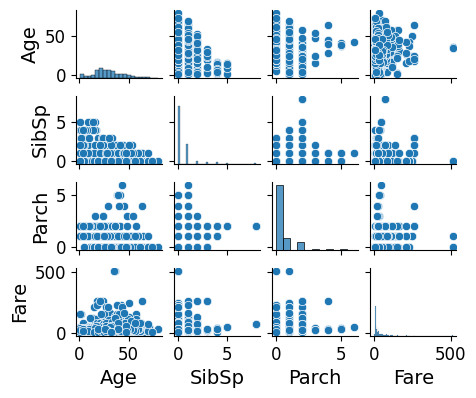

time: 4.55 s (started: 2024-10-26 13:18:01 +00:00)


In [ ]:
sns.pairplot(df[nums],height=1, aspect=1.2);

- Diagonala bakıldığında Age dışındakiler skewed görünüyor, bunlardan SiSp ve Parch zaten küçük sayılar bi log transformasyona gerek yok ama Fare'de gerekli gibi
- Yine diagonaldakilerin kimisinde outlier da var gibi, boxplotla ayrıca bakarız
- kolonlar arası collinearity yok görünüyor

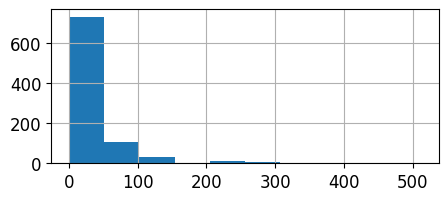

time: 262 ms (started: 2024-10-26 13:18:06 +00:00)


In [ ]:
#transformasyon öncesi
df.Fare.hist(figsize=(5,2));

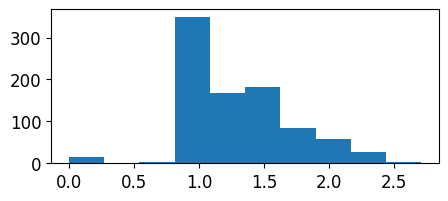

time: 207 ms (started: 2024-10-26 13:18:06 +00:00)


In [ ]:
#transformasyon sonrası
plt.figure(figsize=(5,2))
plt.hist(np.log10(df.Fare+1));

Tam normal dağılım olmadı ama yine de scaling için yeterli gibi.

Şimdi de korelasyonlara bakalım, bunun için **dython** kütüphanesinden faydalanacağız. Zira bu kütüphane ile hem numeric-numeric, hem numeric-kategorik, hem de kategorik-kategorik korelasyonlar tek bi fonksiyonla elde edilebilmektedir.

In [ ]:
!pip -q install dython

time: 3.22 s (started: 2024-10-26 13:18:07 +00:00)


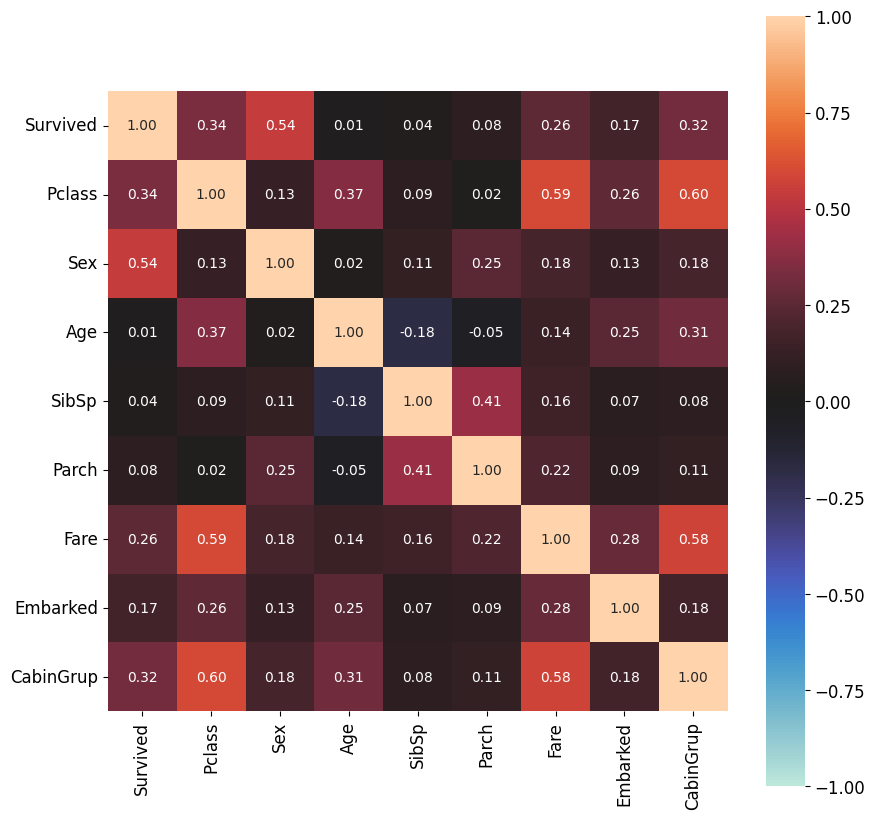

In [ ]:
from dython.nominal import associations
corrdict=associations(df,nominal_columns=cats,numerical_columns=nums,figsize=(10,10))

Targetla en yüksek korelasyonu olan kolonlara bakalım. Gözle de görülüyor ama kodla da bakalım

In [ ]:
corr_results=corrdict["corr"] #dataframe
da.getHighestPairsOfCorrelation(corr_results,"Survived",5)

time: 953 ms (started: 2024-10-26 13:18:10 +00:00)


,Survived
Sex,0.540200
Pclass,0.336684
CabinGrup,0.320034
Fare,0.257307
Embarked,0.173099


time: 5.87 ms (started: 2024-10-26 13:18:11 +00:00)


Bu korelasyon değerlerinden feature selection aşamasında yararlanabiliriz.

#### Outliers

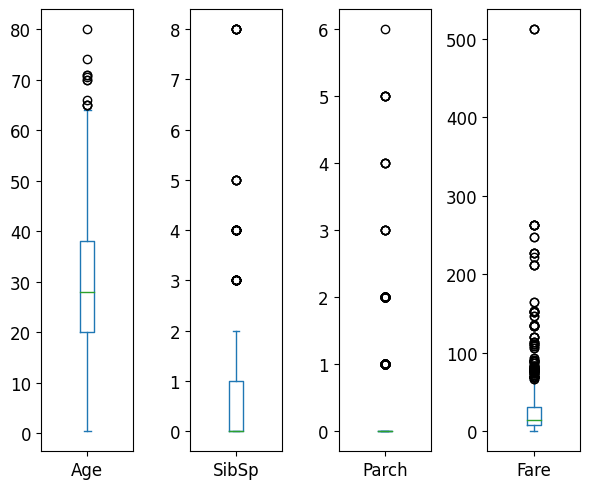

time: 1.15 s (started: 2024-10-26 13:18:11 +00:00)


In [ ]:
df[nums].plot(kind="box", subplots = True,figsize=(6,5))
plt.tight_layout();

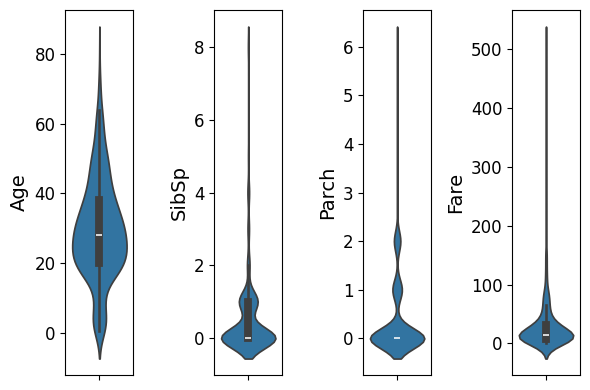

time: 1.14 s (started: 2024-10-26 13:18:12 +00:00)


In [ ]:
plt.figure(figsize=(6,4))
for e,n in enumerate(nums):
    plt.subplot(1,len(nums),e+1)
    ch=sns.violinplot(y=n, data=df)
plt.tight_layout()
plt.show();

In [ ]:
da.outlierinfo(df,nums,imputestrategy="None",thresh=0.25)

Age, Min:0.42, Max:80.0, Q1:    20.12, Q3:    38.00, IQR:    17.88, Q3+1,5*IQR:    64.81, Q1-1,5*IQR:    -6.69, Mean within the box:    69.77, Total Mean:    29.70, Outliers:11

SibSp, Min:0, Max:8, Q1:     0.00, Q3:     1.00, IQR:     1.00, Q3+1,5*IQR:     2.50, Q1-1,5*IQR:    -1.50, Mean within the box:     4.37, Total Mean:     0.52, Outliers:46

Parch, Min:0, Max:6, Q1:     0.00, Q3:     0.00, IQR:     0.00, Q3+1,5*IQR:     0.00, Q1-1,5*IQR:     0.00, Mean within the box:     1.60, Total Mean:     0.38, Outliers:213

Fare, Min:0.0, Max:512.3292, Q1:     7.91, Q3:    31.00, IQR:    23.09, Q3+1,5*IQR:    65.63, Q1-1,5*IQR:   -26.72, Mean within the box:   128.29, Total Mean:    32.20, Outliers:116

time: 25.8 ms (started: 2024-10-26 13:18:13 +00:00)


In [ ]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.25)

11 outliers exists in feature 'Age'
46 outliers exists in feature 'SibSp'
213 outliers exists in feature 'Parch'
116 outliers exists in feature 'Fare'
time: 20.8 ms (started: 2024-10-26 13:18:13 +00:00)


In [ ]:
da.outliers_IQR(df,nums,imputestrategy="None",thresh=0.1)

46 outliers exists in feature 'SibSp'
1 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'
time: 19.2 ms (started: 2024-10-26 13:18:13 +00:00)


Evet hepsinde outlier var, özellikle Fare'de. SizSp ve Parch her ne kadar outlier gösterse de bunlar outlier olarak ele alınmamalı, çünkü bunlar kişi sayısı ve çok da bir uç değer yok aslında.

In [ ]:
# z score'a göre de bakalım
da.outliers_zs(df,nums,imputestrategy="None")

12 outliers exists in feature 'SibSp'
10 outliers exists in feature 'Parch'
17 outliers exists in feature 'Fare'
time: 18.6 ms (started: 2024-10-26 13:18:14 +00:00)


In [ ]:
# standar sapmaya göre de bakalım
da.outliers_std(df,nums,imputestrategy="None")

2 outliers exists in feature 'Age'
30 outliers exists in feature 'SibSp'
15 outliers exists in feature 'Parch'
20 outliers exists in feature 'Fare'
time: 11.5 ms (started: 2024-10-26 13:18:14 +00:00)


Sonuç olarak, thresholdu 0.1 olan IQR yöntemi ile ilerleriz.

#### Null kontrolü

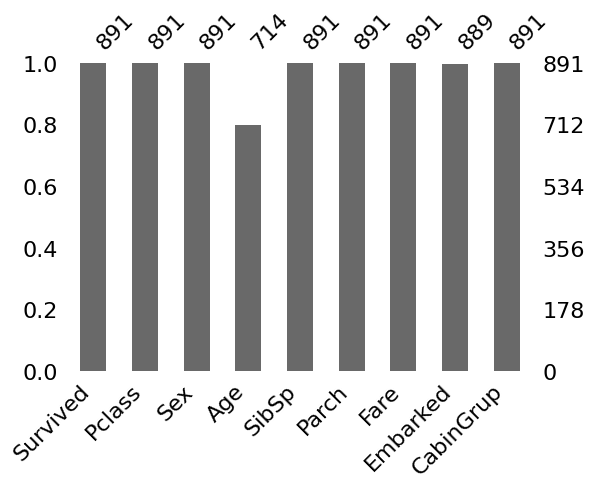

time: 1.68 s (started: 2024-10-26 13:18:14 +00:00)


In [ ]:
import missingno as msno
msno.bar(df, figsize=(6,4));

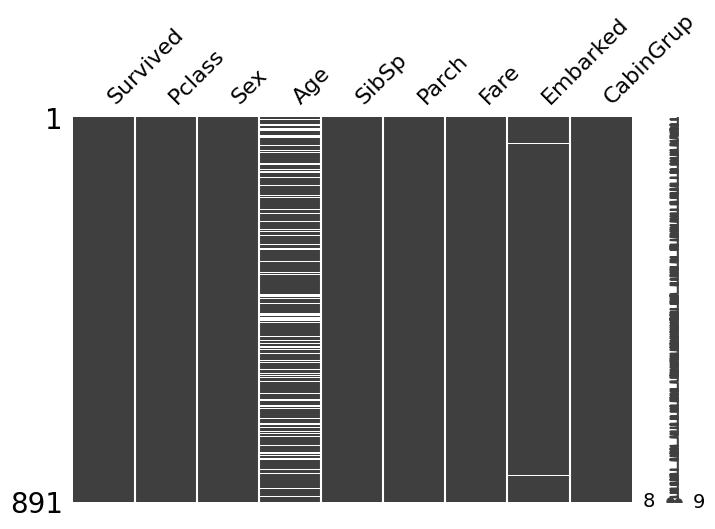

time: 644 ms (started: 2024-10-26 13:18:15 +00:00)


In [ ]:
# da.nullPlot(df)
msno.matrix(df,figsize=(8,5));

In [ ]:
# -1, -999, NA, Tanımsız gibi null yerien geçebilecek değerler var mı diye de bakalım
da.findNullLikeValues(df)

There are no null-like values
Don't forget to check for 0's manually
time: 79.1 ms (started: 2024-10-26 13:18:16 +00:00)


### Target bazlı analizler

Targetın dağılımına bakalım

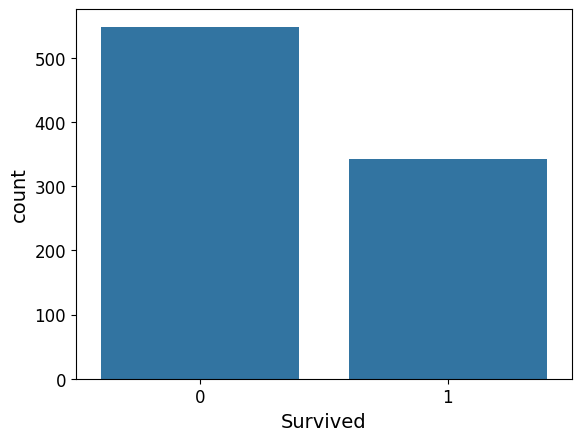

time: 270 ms (started: 2024-10-26 13:18:16 +00:00)


In [ ]:
sns.countplot(x=df["Survived"]);

In [ ]:
df.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


time: 5.46 ms (started: 2024-10-26 13:18:17 +00:00)


Çok büyük olmamakla birlikte hafif bir imbalance sözkonusu.


Target bazında numeriklerin **ortalama** değerlerine bakalım.

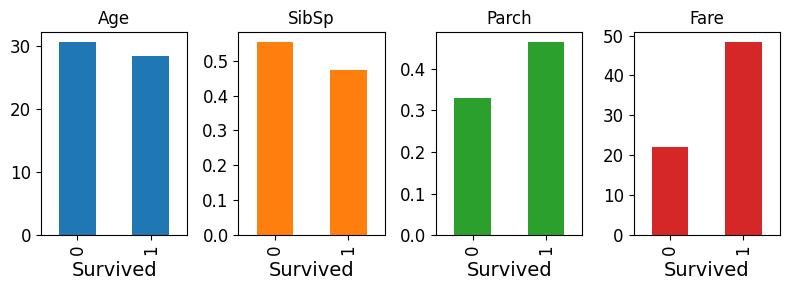

time: 634 ms (started: 2024-10-26 13:18:17 +00:00)


In [ ]:
da.plotNumericsByTarget(df,"Survived",nums=nums,layout=(1,4),figsize=(8, 3))

Fare ve Parch, target bazında oldukça farkediyor, bunların feature importance'ı önemli olacak gibi duruyor. Korelasyon analizinde Fare için bu durumu gözlemlemiştik zaten ancak Parch için aynı durum sözkonusu değil. (Outlier varsa sonuçları yorumlamayı yanıltabilir, ki Fare'da oldukça büyük outlierlar vardı, o yüzden buradaki sonuçlara şuan çok da güvenmemekte fayda var)

Kategorik kolonlar üzerinden baktığımızda ilgili kategorilerdeki her bir değer için Surviving olasılıklarına(prior probability) bakalım.

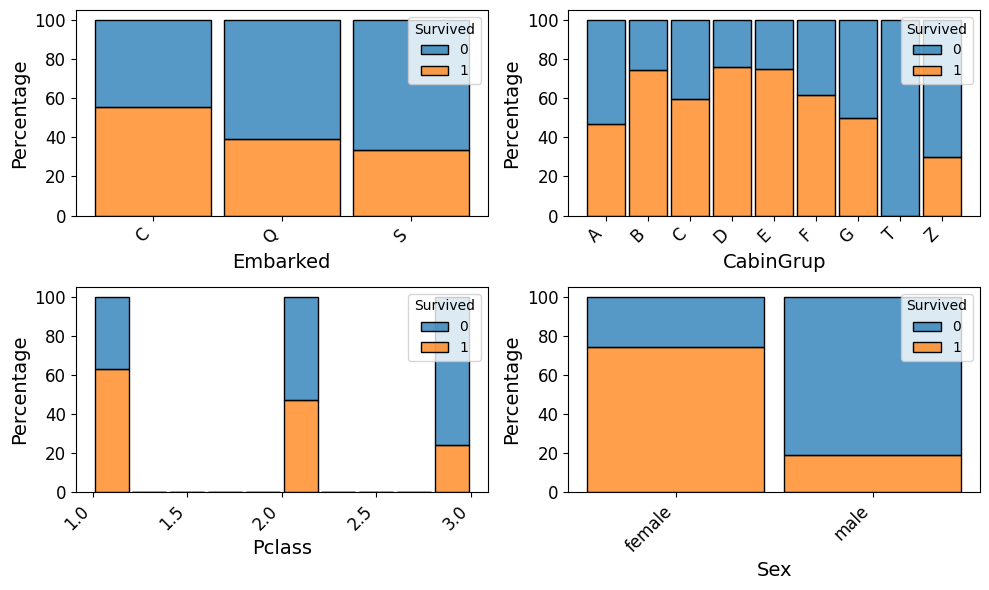

time: 1 s (started: 2024-10-26 13:18:17 +00:00)


In [ ]:
plt.figure(figsize=(10,6))
da.plotTargetByCats(df, cats, "Survived", subplot_tpl=(2,2));

Bu grafikleri şöyle okumak lazım. Öncelikle bunların percentage olduğunu unutmayın:

- 1.sınıflarda hayatta kalma olasılığı daha yüksek olmuş
- Kadınlarda hayatta kalma olasılığı daha yüksek olmuş
- Cherbourg'dan binenler daha şanslıymış
- T Cabin grubunda olanların hiçbiri hayatta kalamamış(muhtemelen en dezavantajlı kabin), sonra kabin numarası bilinmeyenler en şanssız iken, B,D ve E gruplarındakiler daha şanslıymış

Şimdi de hayatta kalanların kategoriler bazındaki dağılımına bakalım.

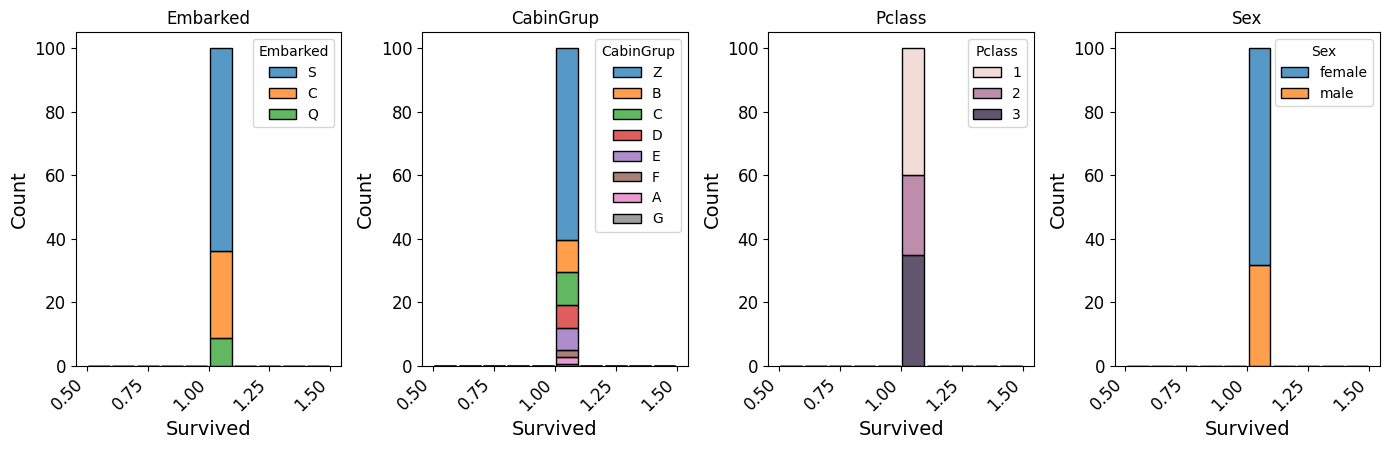

time: 1.72 s (started: 2024-10-26 13:18:18 +00:00)


In [ ]:
plt.figure(figsize=(14,8))
da.plotPositiveTargetByCats(df, cats, "Survived", subplot_tpl=(2,4),pos_label=1);

Yorumlar

Kurtulanların çoğunluğu;

- Kadın
- Southamptondan binenler
- Kabin numarası bilinmeyenler

Her bir kategorik feature ve numerik feature çifti için target'ın ortalama değerlerine bakalım.

Plots for Age,
----------------------


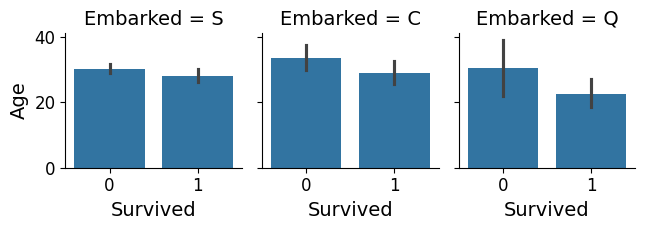

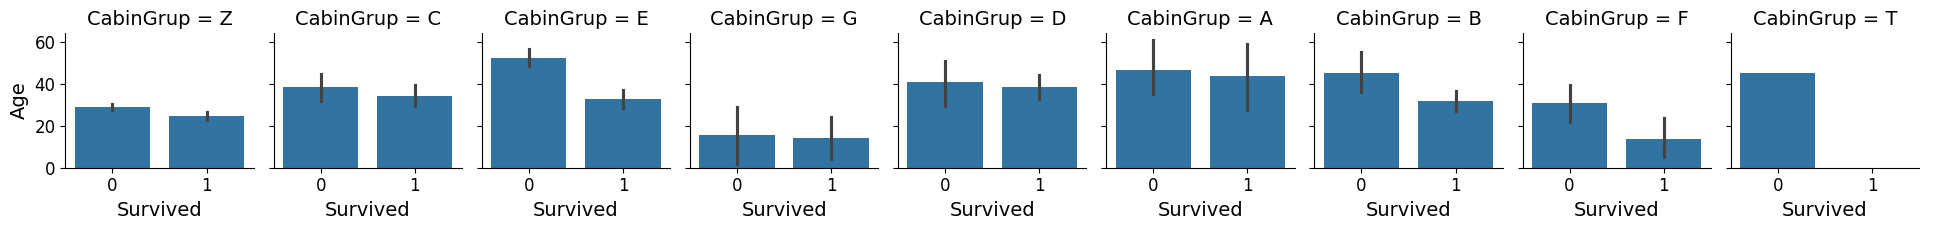

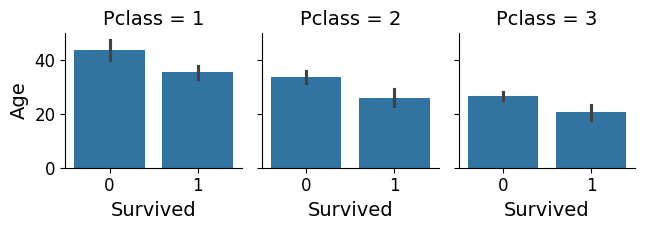

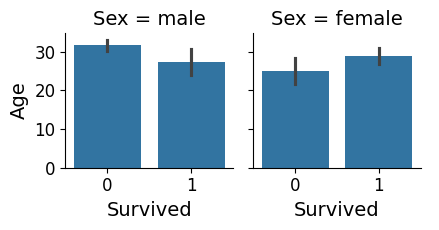

Plots for SibSp,
----------------------


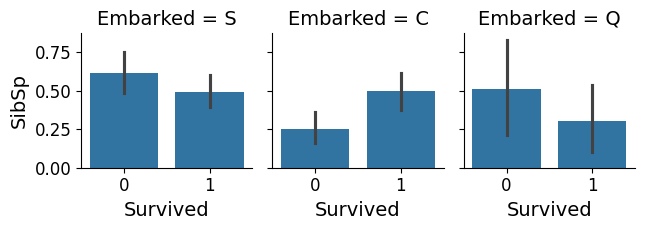

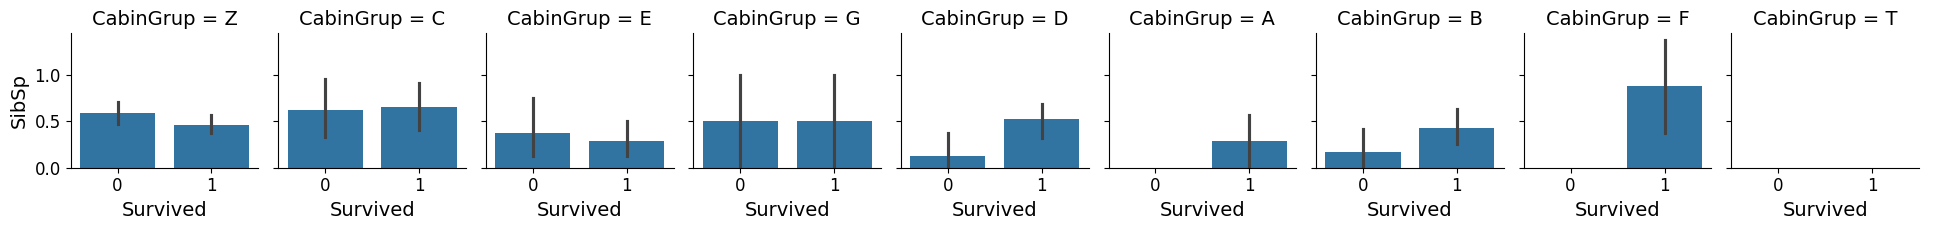

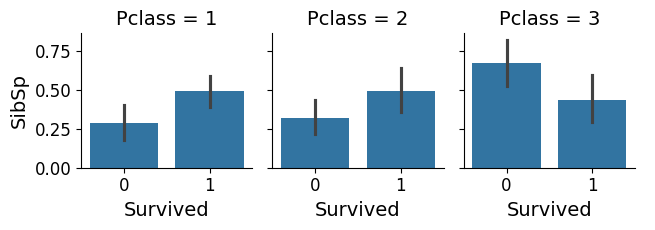

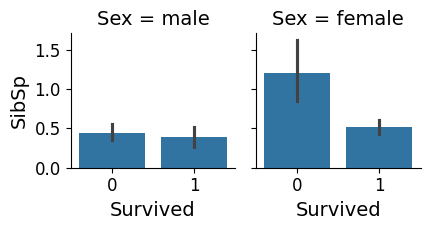

Plots for Parch,
----------------------


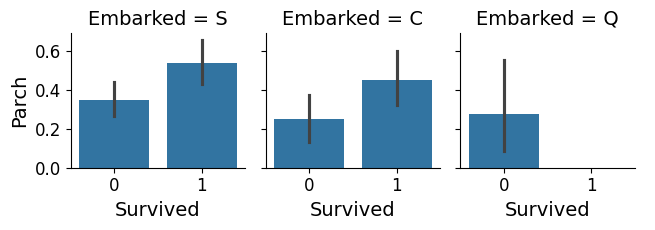

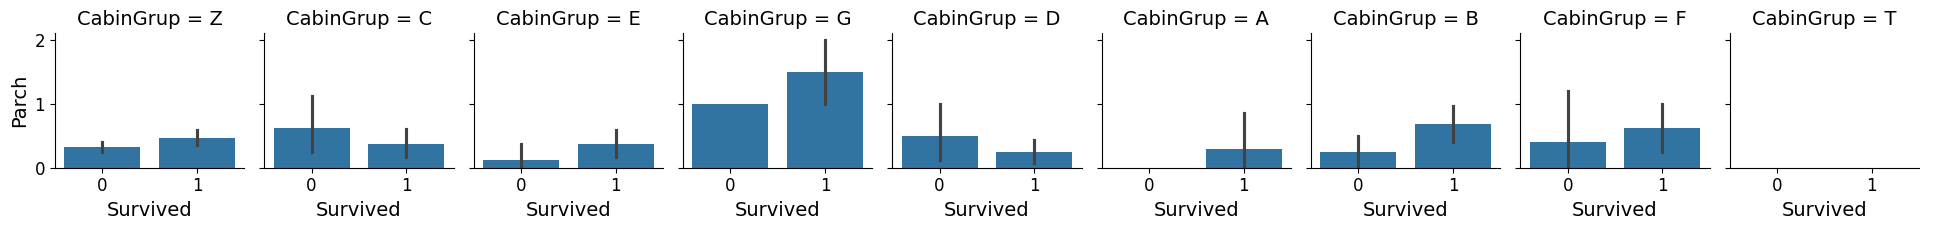

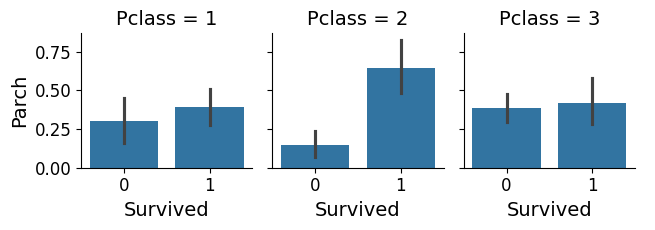

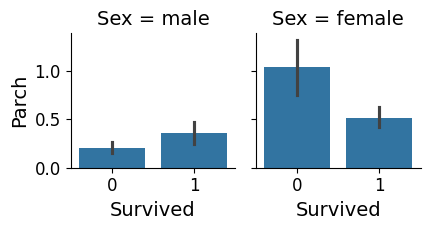

Plots for Fare,
----------------------


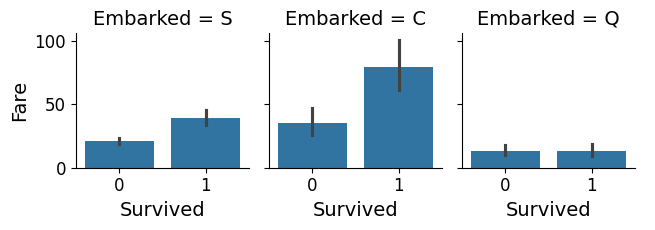

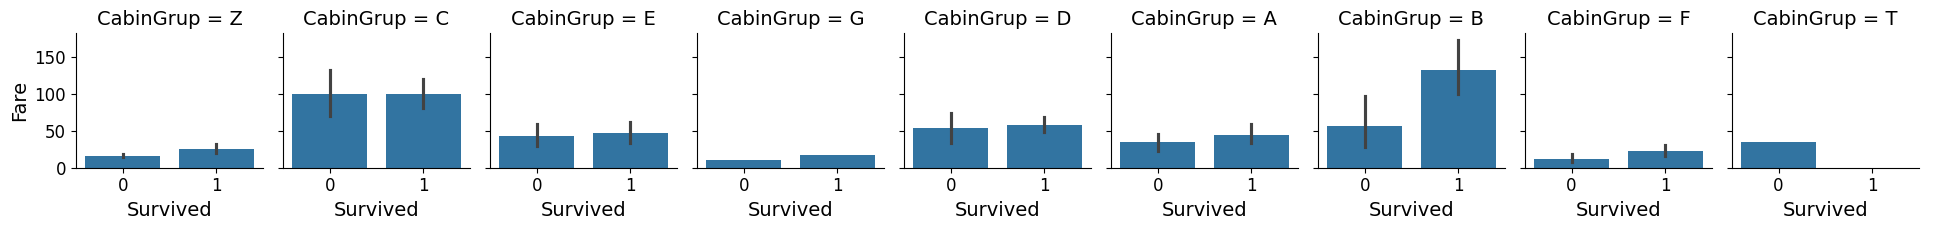

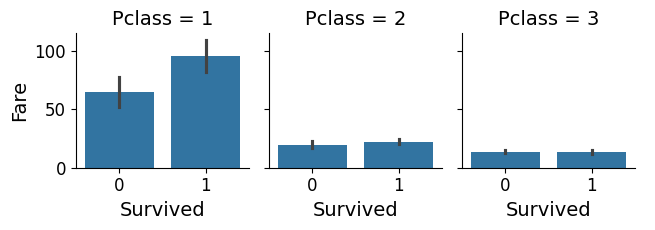

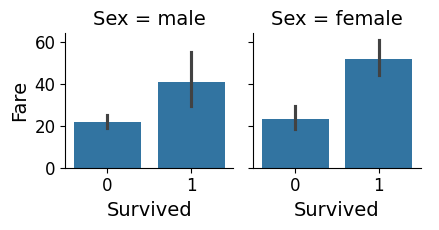

time: 22 s (started: 2024-10-26 13:18:20 +00:00)


In [ ]:
da.plotTargetForNumCatsPairs(df,nums,cats,"Survived",2.4,0.9)

Son olarak da targetın diğer kategoriler bazında ortalama numerik değerlerine bakalım

Plots for Age,
----------------------


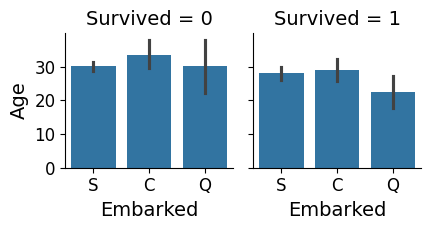

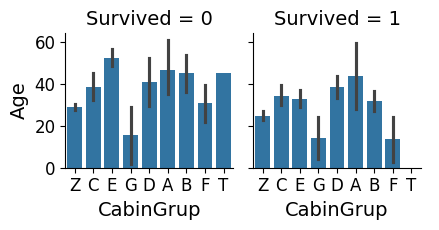

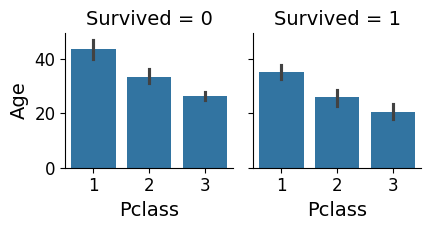

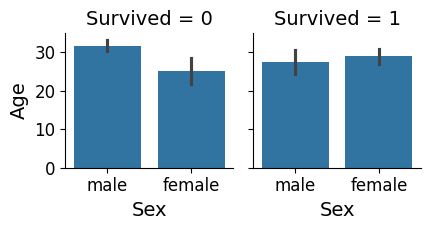

Plots for SibSp,
----------------------


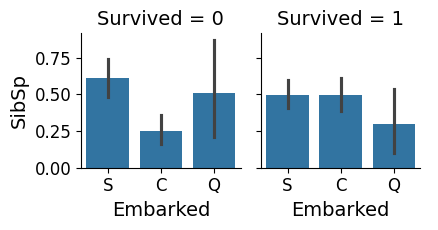

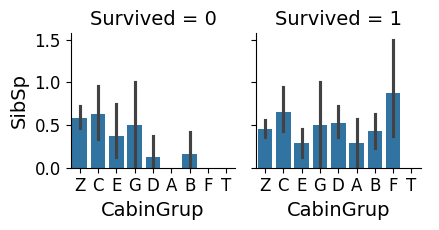

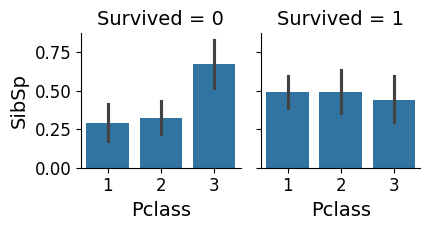

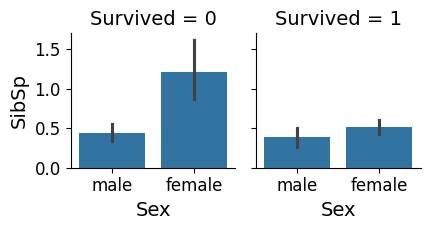

Plots for Parch,
----------------------


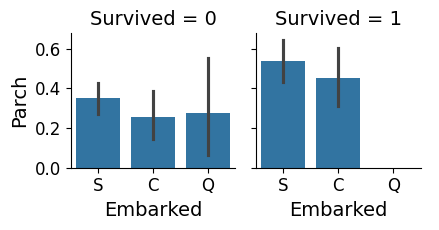

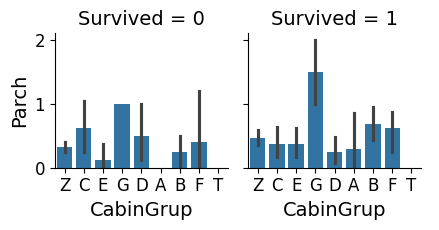

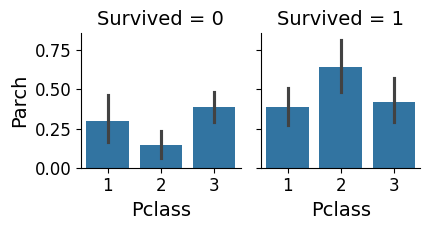

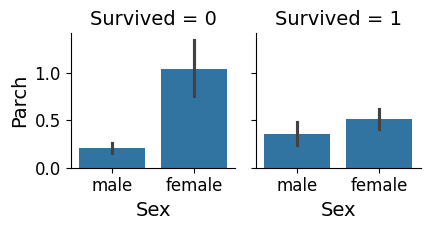

Plots for Fare,
----------------------


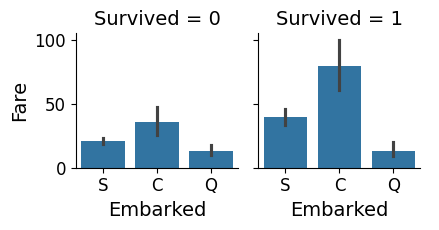

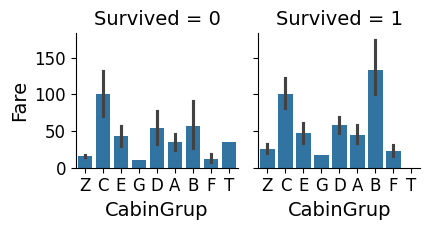

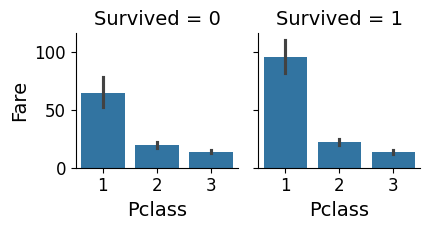

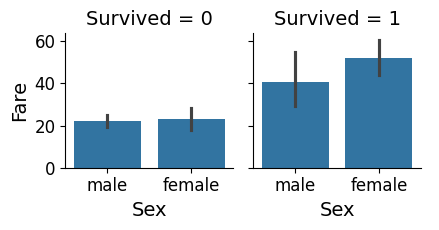

time: 13.9 s (started: 2024-10-26 13:18:42 +00:00)


In [ ]:
da.plotCategoricForNumTargetPairs(df,nums,cats,"Survived",2.4,0.9)

Bunları yorumlamayı size bırakıyorum.

#### Surival'ın iki yüzü

Farkettiyseniz, hangi yönden baktığınıza göre rakamlarda çelişki, veya açıklaması zor bir durum varmış gibi görünüyor. Burada aslıdna iki ayrı durum var: **Kurtulma oranı(pozitiflerin yüzdesi)** ve **Kurtulanların(pozitiflerin) mutlak rakamı**. Şimdi bunlardan embark noktasına göre bir detay inceleme yapalım.

In [ ]:
df.groupby("Embarked")["Survived"].value_counts(normalize=True).to_frame().join(
df.groupby("Embarked")["Survived"].value_counts().to_frame())

proportion  count
Embarked Survived                   
C        1           0.553571     93
         0           0.446429     75
Q        0           0.610390     47
         1           0.389610     30
S        0           0.663043    427
         1           0.336957    217

time: 25 ms (started: 2024-10-26 13:18:56 +00:00)


Görüldüğü üzere Southampton'dan binenler sayıca zaten fazla olduğu için, toplam kurtulanlar içinde bunların sayısının ve oranının fazla olması da gayet normal. Cherbourg'dan binenlerin yarıdan fazlasının kurtulması ise esas odaklanılması gereken şey. Orada muhtemelen ya bu datasetteki başka bir featurela açıklanan bir durum vardır(fare, class gibi), ki bu zaten multicollinearity'ye işarettir, bunu incelemeyi size bırakıyorum(Burada chi2 testi arkadaşınız olacak). yahut da burda olmayan bir bilgi de bu durumu açıklayabilirdi, ör: uçuk bir hipotezle geleyim, o bölgede yaşayanlar Rus asıllıdır ve Ruslar da soğuk suya dayanıklı olduğu için kurtulmuşlardır :)

Benzer analizi diğer featurelar üzerinden de yapabilirsiniz.

### Checking for cleaning

In [ ]:
#numeric borders, check the min-max
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


time: 26.7 ms (started: 2024-10-26 13:18:56 +00:00)


Age kolonunda min değer biraz garip görünüyor, bu bir bebek olabilir, bakalım yaşı 1den küçük kaç yolcu var

In [ ]:
df[df.Age<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
78,1,2,male,0.83,0,2,29.0000,S,Z
305,1,1,male,0.92,1,2,151.5500,S,C
469,1,3,female,0.75,2,1,19.2583,C,Z
644,1,3,female,0.75,2,1,19.2583,C,Z
755,1,2,male,0.67,1,1,14.5000,S,Z
803,1,3,male,0.42,0,1,8.5167,C,Z
831,1,2,male,0.83,1,1,18.7500,S,Z


time: 21.4 ms (started: 2024-10-26 13:18:56 +00:00)


Bunların hepsini bebek gibi düşünebiliriz, ve belki de outlier capping yapıp yaşı 2'den küçük tüm çocukları 2 yapabilriiz.

yukarıda low-cardinalitysi olan featureların unique valuelarına tekrar bakalım, anormal bir değer var mı, görelim. (Yok)

### Diğer işlemler

In [ ]:
#duplicate check for rows
len(df)-len(df.duplicated(keep=False))

0

time: 4.38 ms (started: 2024-10-26 13:18:56 +00:00)


In [ ]:
#duplicate check for columns
len(set(df.columns))-len(df.columns)

0

time: 2.65 ms (started: 2024-10-26 13:18:56 +00:00)


In [ ]:
#multicollinearty check->remove one if r>0.9 if numeric, # >0,5 if nominal/mixed
corr_results[corr_results>0.5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
Survived,1.0000,NaN,0.5402,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,1.000000,NaN,NaN,NaN,NaN,0.594217,NaN,0.598269
Sex,0.5402,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Fare,NaN,0.594217,NaN,NaN,NaN,NaN,1.000000,NaN,0.576878
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CabinGrup,NaN,0.598269,NaN,NaN,NaN,NaN,0.576878,NaN,1.000000


time: 24.6 ms (started: 2024-10-26 13:18:56 +00:00)


In [ ]:
# any need for conversion, 100 USD-->100
#yok

time: 841 µs (started: 2024-10-26 13:18:56 +00:00)


In [ ]:
#check for feature extraction
#bunu Cabin için zaten yaptık, pipelinea da eklemeyi unutmayalım

time: 753 µs (started: 2024-10-26 13:18:56 +00:00)


## Varsayımların kontrolü

Çok kritik varsayımlar olmadığı ve genel kullanılan bi dataseti olduğu için pas geçiyorum.

## Preparing X,y and train-test splits

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGrup
0,0,3,male,22.0,1,0,7.2500,S,Z
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,Z
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,Z


time: 20.6 ms (started: 2024-10-26 13:18:56 +00:00)


In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0].values

time: 1.93 ms (started: 2024-10-26 13:18:57 +00:00)


In [ ]:
#if imbalanced add stratify=y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

time: 4.58 ms (started: 2024-10-26 13:18:57 +00:00)


In [ ]:
list(map(np.shape, (X_train, X_test, y_train, y_test)))

[(668, 8), (223, 8), (668,), (223,)]

time: 3.8 ms (started: 2024-10-26 13:18:57 +00:00)


In [ ]:
list(map(type, (X_train, X_test, y_train, y_test)))

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray]

time: 2.74 ms (started: 2024-10-26 13:18:57 +00:00)


## Modelleme

Logistic Regression ile birlikte benzer mantıkta çalışan birkaç classfiera daha bakacağız.

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier

time: 1.13 ms (started: 2024-10-26 13:18:57 +00:00)


Diğer ikisini kısaca tanıyalım:

**Lasso**

LinReg notebookunda detay bilgi var, <a href="https://machinelearningmastery.com/lasso-regression-with-python/">şuraya</a> da bakabilirsiniz. Burda belirtildiği gibi Lasso, en küçük kareler problemini L1 cezasıyla(penaltı) optimize eder. Tanım olarak, Lasso ile bir lojistik fonksiyonu optimize edemezsiniz. L1 cezalı bir lojistik fonksiyonu optimize etmek istiyorsanız, L1 parametreli LogReg modeli kullanabilirsiniz. Yani özetle, **LinReg'de olduğunun aksine Lasso sınıfnı kullanmayacağız**, bunun için penalty parametresini kullanacağız.

**RidgeClassifer**

Bu da L2 penaltısı kullanır, LogReg'den daha hızlı.

**SGDClassifier**

SGD, ayrı bi tahminleme algoritması değil, bir optimizasyon yöntemidir. Lineer regresyon notebookunda bunu incelemiştik. SGDClassifer, sklearn içinde her ne kadar ayrı bir algoritmaymış gibi tutulmuş olsa da aslında bu optimizasyon yöntemi olarak SGD uygulayan lineer bir classifierdır. Burda loss="log_loss dediğimizde aslında optimizer olarak OLS değil de SGD kullanan bir LogReg eğitmiş oluruz.(log-loss yerine hinge kullanılırsa da bu sefer SVM eğitilmiş olur)

Özellikle sample sayısı çokken, yani large data sözkonusu iken işe yarar, hem RAM hem CPU açısından daha verimli.

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/sgd.html#sgd

### Model selection

#### hyperparametreler

LogReg'in birçok hyperparametresi var ancak eğitimlerde çoğunlukla 1-2 tanesi üzerinde durulup geçilir. Ben öyle yapmanızı tavsiye etmiyorum. Buraya da copy paste yapmanın bi anlamı yok, dokümantasyonundan lütfen her parametrenin ne olduğuna, hangisinin neyle birlikte kullanılması gerektiğine bakın. Bunları doğru yapmazsanız ya eğitimlerde yüzeysel anlatıldığı gibi basit bir gridsearch yapmış olursunuz ve bu da muhtemelen yetersiz kalır, çünkü tüm olası seçenekleri denememiş olursunuz, ya da herşeyi birlikte denemeye çalışıp hatalar alırsınız, çünkü her parametrenin her değeri birbiriyle uyumlu değil. O yüzden birbiriyle uyumlu olacak geniş bir parametre uzayını denemek için bunlara hakim olmanız gerekir.

Aşağıda [sklearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) sayfasından aldığım **solver x penalty** matrisi bu anlamda oldukça yol göstericidir.

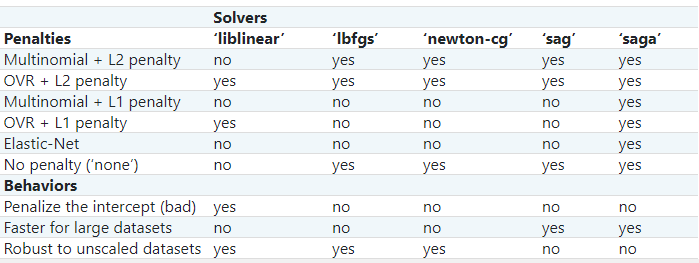

Solverlar(oppitmizerlar) hakkında detaylı bilgiyi <a href="https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions">buradan</a> ve <a href="https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451">buradan</a> elde edebilrsiniz.

#### Pipeline

Şimdi yavaştan [pipelineımızı](https://medium.com/@mvolkanyurtseven/makine-%C3%B6%C4%9Frenimi-felsefesi-6-part-ii-d6d05e989241#f553) kurmaya başlayalım. Öncelikle outlierhandlerımız olan custom class tanımımızı yapalım.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def logTransformer(df,col_name):
    temp=df.copy() #her defasında orjinal X_train bozulmasın diye, yoksa gridi 2.kez çalıştırdığımda hata alıyoruz
    temp[col_name] = np.log10(temp[col_name]+0.01)
    return temp

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, featureindices): #if only specific columns to be processed
        self.featureindices = featureindices

    def fit(self, X:np.array, y = None):
        Q1s = np.quantile(X[:,self.featureindices],0.1,axis=0)
        Q3s = np.quantile(X[:,self.featureindices],0.9,axis=0)
        IQRs = Q3s-Q1s
        self.top=(Q3s + 1.5 * IQRs)
        self.bottom=(Q1s - 1.5 * IQRs)
        return self

    def transform(self, X:np.array, y = None ):
        X[:,self.featureindices]=np.where(X[:,self.featureindices]>self.top,self.top,X[:,self.featureindices])
        X[:,self.featureindices]=np.where(X[:,self.featureindices]<self.bottom,self.bottom,X[:,self.featureindices])
        return X

time: 2.49 ms (started: 2024-10-26 13:18:57 +00:00)


parametergrid içinde kullanılacak bazı variableları tanımlayalım.

In [ ]:
c_range=np.logspace(4,-5, num=10) #ilk run'da ideal noktayı bulacağız. ikinci run'da idealin etrafında daraltma yapacağız. c, 1/lambda idi, yani regülarizasyon seviyesi
weights = np.arange(2,11,2)
min_res=50
fact=3
mi=4000 #max_iter for LogReg

time: 1.88 ms (started: 2024-10-26 13:18:57 +00:00)


ve tüm pipelınımız da şöyle olur

In [ ]:
%%time
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

np.random.seed(42) #RandomizedSearchCV için

#outlier handling ve scaling için
class DummyTransformer(TransformerMixin,BaseEstimator):
    def fit(self,X,y=None): pass
    def transform(self,X,y=None): pass

#3 farklı classifier için dummy estimator
class DummyEstimator(BaseEstimator):
    def fit(self,X,y=None): pass
    def score(self,X,y=None): pass

cat_pipe=Pipeline([
                   ("ohe", OneHotEncoder(drop="first",handle_unknown='ignore'))
                  ])

num_pipe=Pipeline([
                   ("imp", SimpleImputer(strategy="median")),
                   ("ouh", DummyTransformer()),
                   ("scl", DummyTransformer())
                  ])


coltrans = ColumnTransformer([
                                ('nominals',  cat_pipe, [e for e,v in enumerate(X.columns) if v in noms]),
                                ('numerics',  num_pipe, [e for e,v in enumerate(X.columns) if v in nums])
                                 ],n_jobs=-1,remainder="passthrough") #ordinaller


pipe = Pipeline(steps=[('log', FunctionTransformer(logTransformer,kw_args=dict(col_name="Fare"))),
                       ('ct', coltrans),
                      #  ('fs', SelectKBest(score_func=mutual_info_classif,k=10)), #en çok etkisi olan 10 feature seçilsin, ama bu işlem OHE uygulandıktan sorna deverye girecek, işler karışacak. OHE öncesinde uygularsam da bu sefer OHE'ye girecek olan noms içieriği değişebilir, o yüzden işleri karıştırmamak adına şimdilik iptal ediyorum
                       ('clf', DummyEstimator())
                       ])

params = [
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range,
           'clf__tol'      :[0.001, 0.0001],
           'clf__penalty': ['l2'], #none koymadım, çünkü zaten yüksek C değeri de veriyorum ki bu zaten regularizasyon uygulama demekle aynı şey
           'clf__solver' : ['newton-cg', 'lbfgs','sag','saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range,
           'clf__tol'      :[0.000, 0.0001],
           'clf__penalty': ['l1'],
           'clf__solver' : ['liblinear','saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,
          {
           'clf'         : [LogisticRegression(max_iter=mi,random_state=42)],
           'clf__C'      : c_range,
           'clf__tol'      :[0.001, 0.0001],
           'clf__penalty': ['elasticnet'],
           'clf__l1_ratio':[0.15, 0.5, 1],
           'clf__solver' : ['saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          } ,
          {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : c_range,
           'clf__tol'          : [0.001, 0.0001],
           'clf__penalty'      : ['l1','l2','elasticnet'],
           'clf__l1_ratio'     : [0.15, 0.5, 1],
           'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
           'clf__eta0'          : [0.01, 0.001, 0.0001],
           'clf__early_stopping':[True,False],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler(),MinMaxScaler()]
          } ,
          {
           'clf'              : [RidgeClassifier(random_state=42)],
           'clf__alpha'       : c_range,
           'clf__tol'         :[0.001, 0.0001],
           'clf__solver'      : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
           'clf__class_weight': [{0:1, 1:x} for x in weights] + ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl': [StandardScaler(),MinMaxScaler()]
          }
         ]

mycv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
hrs1 = HalvingRandomSearchCV(estimator = pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1,
                           scoring = 'accuracy',error_score='raise',min_resources=min_res,factor=fact)
hrs1.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 668
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13
n_resources: 50
Fitting 50 folds for each of 13 candidates, totalling 650 fits
----------
iter: 1
n_candidates: 5
n_resources: 150
Fitting 50 folds for each of 5 candidates, totalling 250 fits
----------
iter: 2
n_candidates: 2
n_resources: 450
Fitting 50 folds for each of 2 candidates, totalling 100 fits
CPU times: user 4.72 s, sys: 255 ms, total: 4.97 s
Wall time: 55.4 s


HalvingRandomSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                      error_score='raise',
                      estimator=Pipeline(steps=[('log',
                                                 FunctionTransformer(func=<function logTransformer at 0x7e7147611b40>,
                                                                     kw_args={'col_name': 'Fare'})),
                                                ('ct',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   remainder='passthrough',
                                                                   transformers=[('nominals',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(d...
                                            'clf__alpha': array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 1.e-05]),
                                            'clf__class_weight': [{0: 1, 1: 2},
                                                                  {0: 1, 1: 4},
                                                                  {0: 1, 1: 6},
                                                                  {0: 1, 1: 8},
                                                                  {0: 1, 1: 10},
                                                                  'balanced'],
                                            'clf__solver': ['svd', 'cholesky',
                                                            'lsqr', 'sparse_cg',
                                                            'sag', 'saga'],
                                            'clf__tol': [0.001, 0.0001],
                                            'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                                 3]),
                                                                  None],
                                            'ct__numerics__scl': [StandardScaler(),
                                                                  MinMaxScaler()]}],
                      scoring='accuracy', verbose=1)

time: 55.8 s (started: 2024-10-26 13:18:57 +00:00)


In [ ]:
ml.gridsearch_to_df(hrs1,5)

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__class_weight,param_clf__alpha,param_clf,param_clf__solver,param_clf__C,mean_test_score,std_test_score
19,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,RidgeClassifier(random_state=42),cholesky,NaN,0.790235,0.043490
17,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,RidgeClassifier(random_state=42),cholesky,NaN,0.778736,0.072210
18,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,elasticnet,constant,1.0,0.0001,False,balanced,0.010,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.773740,0.045706
16,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,elasticnet,constant,1.0,0.0001,False,balanced,0.010,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.738529,0.075656
3,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,NaN,NaN,NaN,NaN,NaN,balanced,0.001,RidgeClassifier(random_state=42),cholesky,NaN,0.734667,0.136529


time: 41.1 ms (started: 2024-10-26 13:19:53 +00:00)


In [ ]:
ml.compareEstimatorsInGridSearch(hrs1,tableorplot='table')

,MAX of mean_test_score,MIN of mean_fit_time
param_clf,,
RidgeClassifier,0.790235,0.032552
SGDClassifier,0.773740,0.031389
LogisticRegression,0.659494,0.056477


time: 30.7 ms (started: 2024-10-26 13:19:53 +00:00)


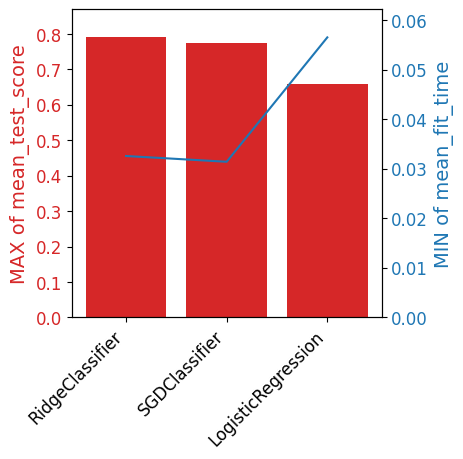

time: 292 ms (started: 2024-10-26 13:19:53 +00:00)


In [ ]:
ml.compareEstimatorsInGridSearch(hrs1,tableorplot='plot',figsize=(4,4))

Normal veya halving gridsearch yapsaydık 5.664.000 adet model çalışacaktı, bunu local makinede yapmak imkansız gibi. Peki halvingsiz normal randomsearch yapsak, ne kadar sürerdi ona bakalım, bi de skorumuz çok farkediyor mu, yani halvingrandom çalıştırmak değmiş mi görelim,

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rs1 = RandomizedSearchCV(estimator=pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1,
                          scoring = 'accuracy',error_score='raise',n_iter=100)
rs1.fit(X_train, y_train)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
CPU times: user 21.8 s, sys: 549 ms, total: 22.3 s
Wall time: 4min 54s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                   error_score='raise',
                   estimator=Pipeline(steps=[('log',
                                              FunctionTransformer(func=<function logTransformer at 0x7e7147611b40>,
                                                                  kw_args={'col_name': 'Fare'})),
                                             ('ct',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('nominals',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop...
                                         'clf__alpha': array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 1.e-05]),
                                         'clf__class_weight': [{0: 1, 1: 2},
                                                               {0: 1, 1: 4},
                                                               {0: 1, 1: 6},
                                                               {0: 1, 1: 8},
                                                               {0: 1, 1: 10},
                                                               'balanced'],
                                         'clf__solver': ['svd', 'cholesky',
                                                         'lsqr', 'sparse_cg',
                                                         'sag', 'saga'],
                                         'clf__tol': [0.001, 0.0001],
                                         'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                              3]),
                                                               None],
                                         'ct__numerics__scl': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   scoring='accuracy', verbose=1)

time: 4min 55s (started: 2024-10-26 13:19:53 +00:00)


In [ ]:
ml.gridsearch_to_df(rs1,5)

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__class_weight,param_clf__alpha,param_clf,param_clf__solver,param_clf__C,mean_test_score,std_test_score
29,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0010,l1,constant,0.5,0.0100,True,balanced,0.00001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.788054,0.034758
21,MinMaxScaler(),"OutlierHandler(featureindices=[0, 3])",0.0010,l1,adaptive,0.5,0.0100,True,balanced,0.00001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.786992,0.030304
67,StandardScaler(),None,0.0010,l2,optimal,0.5,0.0010,False,balanced,0.00100,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.786829,0.039258
94,StandardScaler(),None,0.0010,l1,adaptive,0.5,0.0100,False,"{0: 1, 1: 2}",0.01000,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.786247,0.037753
39,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0001,elasticnet,constant,0.5,0.0001,False,balanced,0.00010,"SGDClassifier(loss='log_loss', max_iter=4000, ...",NaN,NaN,0.785801,0.035637


time: 75.9 ms (started: 2024-10-26 13:24:49 +00:00)


In [ ]:
ml.compareEstimatorsInGridSearch(rs1,tableorplot='table')

,MAX of mean_test_score,MIN of mean_fit_time
param_clf,,
SGDClassifier,0.788054,0.034028
RidgeClassifier,0.785356,0.037027
LogisticRegression,0.743727,0.078997


time: 39.3 ms (started: 2024-10-26 13:24:49 +00:00)


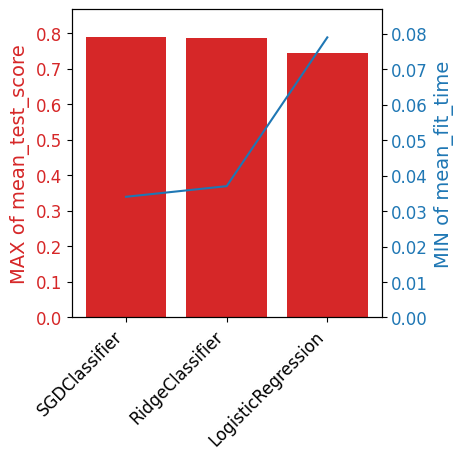

time: 320 ms (started: 2024-10-26 13:24:49 +00:00)


In [ ]:
ml.compareEstimatorsInGridSearch(rs1,tableorplot='plot',figsize=(4,4))

Halvingde 1 puanlık bir artımız bile olmuş, süre performansı cabası(*randomlık nedeniyle notebook her çalışıtğında burdaki değer ve yapılacak yorum da değişecektir*)

 Şimdi şunu yapabiliriz. rs1'in sonuçlarına bakıp rakamsal parametrelerden en iyi olanların yeni değer uzayını daraltıp şimdi bu sefer tekrar halvingli random kullanabilir ve performansta bir tık daha iyileşme sağlayabiliriz.

In [ ]:
ml.gridsearch_to_df(rs1,1).T

,29
param_ct__numerics__scl,StandardScaler()
param_ct__numerics__ouh,"OutlierHandler(featureindices=[0, 3])"
param_clf__tol,0.001
param_clf__penalty,l1
param_clf__learning_rate,constant
param_clf__l1_ratio,0.5
param_clf__eta0,0.01
param_clf__early_stopping,True
param_clf__class_weight,balanced
param_clf__alpha,0.00001


time: 13.6 ms (started: 2024-10-26 13:24:50 +00:00)


In [ ]:
%%time
params= [
    {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : [0.001, 0.002, 0.005],
           'clf__tol'          : [0.0005, 0.001,0.002,0.005],
           'clf__penalty'      : ['l1'],
           'clf__l1_ratio'     : [0.3, 0.5, 0.7],
           'clf__learning_rate': ['adaptive'],
           'clf__eta0'          : [0.005, 0.01, 0.02],
           'clf__early_stopping':[True,False],
           'clf__class_weight': ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler()]
          }
]

hrs2 = HalvingRandomSearchCV(estimator = pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1,
                           scoring = 'accuracy',error_score='raise',min_resources=min_res,factor=fact)

hrs2.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 668
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13
n_resources: 50
Fitting 50 folds for each of 13 candidates, totalling 650 fits
----------
iter: 1
n_candidates: 5
n_resources: 150
Fitting 50 folds for each of 5 candidates, totalling 250 fits
----------
iter: 2
n_candidates: 2
n_resources: 450
Fitting 50 folds for each of 2 candidates, totalling 100 fits
CPU times: user 4.39 s, sys: 135 ms, total: 4.53 s
Wall time: 59.8 s


HalvingRandomSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                      error_score='raise',
                      estimator=Pipeline(steps=[('log',
                                                 FunctionTransformer(func=<function logTransformer at 0x7e7147611b40>,
                                                                     kw_args={'col_name': 'Fare'})),
                                                ('ct',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   remainder='passthrough',
                                                                   transformers=[('nominals',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(d...
                                            'clf__class_weight': ['balanced'],
                                            'clf__early_stopping': [True,
                                                                    False],
                                            'clf__eta0': [0.005, 0.01, 0.02],
                                            'clf__l1_ratio': [0.3, 0.5, 0.7],
                                            'clf__learning_rate': ['adaptive'],
                                            'clf__penalty': ['l1'],
                                            'clf__tol': [0.0005, 0.001, 0.002,
                                                         0.005],
                                            'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                                 3]),
                                                                  None],
                                            'ct__numerics__scl': [StandardScaler()]}],
                      scoring='accuracy', verbose=1)

time: 1min (started: 2024-10-26 13:24:50 +00:00)


In [ ]:
hrs2.best_score_

0.7960374531835206

time: 3.76 ms (started: 2024-10-26 13:25:50 +00:00)


Çok da işe yaramadı, ilk bulduğumuz sonuçlar daha iyiydi, belki birkaç kez çalıştırmak gerekebilir. Bununla birlikte "titanic logistic regression" diye bir google araması yaparsanız zaten çoğu kişin %80 civarı bir accuracy bulduğunu görürsünüz. Başka neler yapılarak skor iyileştirilebilir:

- kişilerin ismindeki Mr., Mrs gibi ünvanlar çıkartılabilir
- yukarda söylediğimiz ama yapmadığımız, age için minimum yaş olarak 2 belirlenebilir, hatta age alanı belki discretize edilebilir
- fare featuru da discretize edilebilir
- age alanının simpleimputer yapmak yerine, iterativeimputer yapılabilir. yukarıdaki pipelineımız bunu destekler nitelikte, orada aynı işlem için istediğimiz kadar transformer kullanabiliyoruz(scalerlarda yaptığmız gibi)
- ve şuan aklıma gelmeyen, sizin aklınıza gelebilecek diğer yöntemler
- tabiki son olarak, LogReg dışında başka algoritmalar denenebilir.

### Model değerlendirme(evaluation)

#### Confusion Matrix ve Classification Report

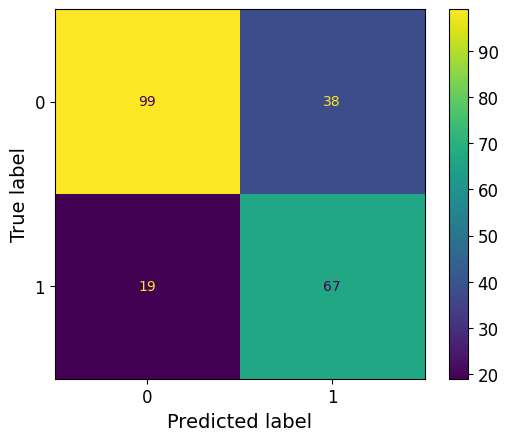

time: 434 ms (started: 2024-10-26 13:25:50 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=rs1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=rs1.classes_).plot();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       137
           1       0.64      0.78      0.70        86

    accuracy                           0.74       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.74      0.75       223

time: 15 ms (started: 2024-10-26 13:25:50 +00:00)


#### Learning Curve

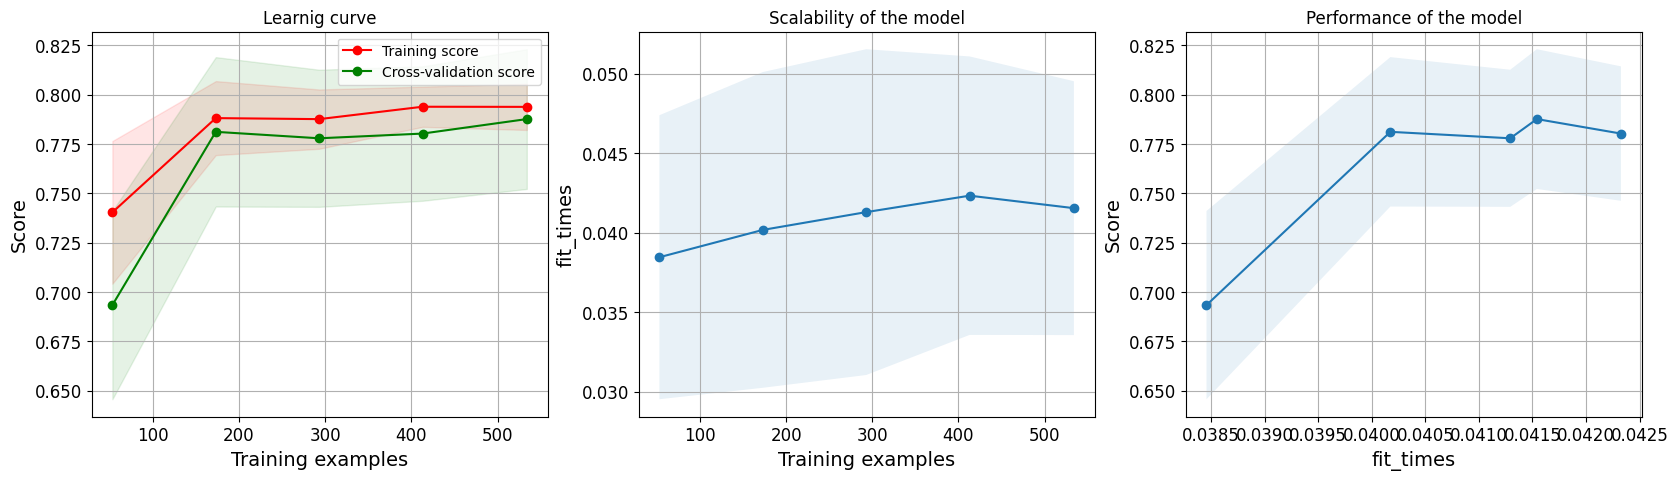

time: 23.3 s (started: 2024-10-26 13:25:50 +00:00)


In [ ]:
ml.plot_learning_curve(rs1.best_estimator_,"Learnig curve",X_train,y_train,cv=mycv)

**Learnig curve**

Bu grafik, eğitim örneklerinin sayısı arttıkça hem eğitim puanının hem de cv skorunun nasıl geliştiğini gösterir.

<font color="red">**Eğitim skoru (kırmızı çizgi)**</font>: Başlangıçta model, az sayıda veri olduğundan eğitim verileri üzerinde çok iyi performans gösterirken test verisinde kötü performans gösteriyor yani overfit ediyor. Veri miktarı arttıkça, modelin genelleştirilebilecek daha fazla verisi olması ve eğitim setinde daha az "ezberlenmesi" nedeniyle eğitim skorunun artış hızı yavaşlar.

<font color="green">**cv skoru (yeşil çizgi)**</font>: Başlangıçta cv puanı eğitim puanından düşük; bu, modelin az miktarda veri üzerinde eğitildiğinde iyi genelleme yapmakta zorlandığını gösteriyor. Ancak eğitim örneklerinin sayısı arttıkça cv skoru ve eğitim ile cv skorları arasındaki fark daralır.

**Yorum**: Eğitim ve cv skorları arasındaki fark azaldıkça model daha fazla eğitim örneğinden yararlanır. cv skoru 0,8 civarında sabitleniyor ve bu da modelin daha iyi genelleme yaptığını gösteriyor.
Sonunda eğitim ve doğrulama puanları arasındaki hafif fark, bir miktar bias'a işaret ediyor, ancak bu ciddi bir fark değil. Model genel olarak iyi performans gösteriyor ve veri hacmi büyüdükçe skor da artıyor, demek daha fazla veri olsa daha iyi sonuçlar alacağız, ancak bu veriseti özelinde öyle birşey mümkün değil :)

**Modelin Ölçeklenebilirliği**

Bu grafik, eğitim örneklerinin sayısı arttıkça eğitim süresinin (modeli eğitmek için gereken süre) nasıl değiştiğini gösterir. Eğitim örneklerinin sayısı arttıkça modeli eğitmek için gereken süre de artar; bu beklenen bir davranıştır. Bizim veri seti özelinde ise eğitim sürelerindeki artışın üstel değil kademeli olduğu görülüyor; bu da modelin ölçeklenebilir olduğunu ve eğitim süresinde dramatik bir artış olmadan daha büyük veri kümelerini işleyebileceğini gösteriyor.

#### ROC ve ROC-AUC

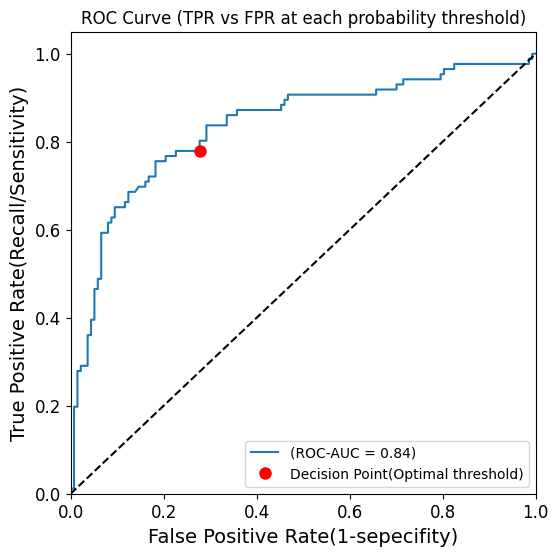

time: 303 ms (started: 2024-10-26 13:26:14 +00:00)


In [ ]:
#if not imbalanced
ml.plotROC(y_test, X_test, rs1, pos_label=1)

**ROC Eğrisinin Bileşenleri:**

Y ekseni(True Pozitif Oranı): Bu, modelin doğru bir şekilde pozitif olarak tanımladığı gerçek pozitiflerin oranını gösterir. Gerçek pozitiflerin toplam gerçek pozitif sayısına oranıdır (TP / (TP + FN)).

X ekseni(False Pozitif Oranı: Bu, yanlışlıkla pozitif olarak tanımlanan gerçek negatiflerin oranını ölçer. False pozitiflerin toplam gerçek negatif sayısına oranıdır (FP / (FP + TN)).

Çapraz kesikli diagonal çizgi: Bu, tahmin gücü olmayan rastgele bir sınıflandırıcının performansını temsil eder. Bu doğrultuda performans gösteren bir model, rastgele tahminden daha iyi olmayacaktır (AUC = 0,5).

<font color="blue">Mavi çizgi (ROC eğrisi)</font>: Bu, threshold değiştikçe gerçek pozitif oranın ve yanlış pozitif oranının nasıl değiştiğini temsil eder. Sınıflar arasında ayrım yapmada iyi olan bir model, bu eğriyi grafiğin sol üst köşesine yaklaştıracaktır.

Genel Yorum:

Eğri sol üst köşeye doğru eğilir; bu, modelimizin pozitif ve negatif sınıfları ayırt etme konusunda iyi bir yeteneğe sahip olduğunu gösteriyor. Çok fazla False Pozitif ortaya çıkmadan yüksek bir True Pozitif oranına ulaşmışız.

AUC'un 0,84 olması güzel bir sonuçtur ve modelimizin iyi bir ayrım gücüne sahip olduğunu gösterir. Bu, negatifleri pozitif olarak yanlış sınıflandırmasından çok daha sık olarak pozitif sınıfı doğru bir şekilde tanımlayabildiği anlamına gelir.

<font color="red">Optimum eşik (kırmızı nokta)</font>, True pozitif oran ile False pozitif oran arasında bir denge olduğunu gösterir. Bu eşikte model, hala çok sayıda gerçek pozitif yakalamaya devam ederken, yanlış pozitifleri en aza indirme açısından iyi bir performans sergiliyor. Bu muhtemelen hedefinize bağlı olarak nihai karar eşiğinizi belirleyeceğiniz yerdir (örneğin, yanlış pozitifleri en aza indirmek veya gerçek pozitifleri maksimuma çıkarmak).   

In [ ]:
from sklearn.metrics import roc_curve

# Get the FPR, TPR, and thresholds from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# Calculate the area under the ROC curve (AUC)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

# 1. Youden's J statistic: maximize TPR - FPR
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold_youden = thresholds[optimal_idx]

# 2. Minimum distance to the top-left corner (TPR=1, FPR=0)
distances = np.sqrt((1 - tpr)**2 + fpr**2)
optimal_idx_distance = np.argmin(distances)
optimal_threshold_distance = thresholds[optimal_idx_distance]

print(f"Optimal threshold by Youden's J: {optimal_threshold_youden}")
print(f"Optimal threshold by min distance: {optimal_threshold_distance}")


0.7508487523340689
Optimal threshold by Youden's J: 1.0
Optimal threshold by min distance: 1.0
time: 5.68 ms (started: 2024-10-26 13:26:14 +00:00)


#### PR-Recall ve PR-AUC

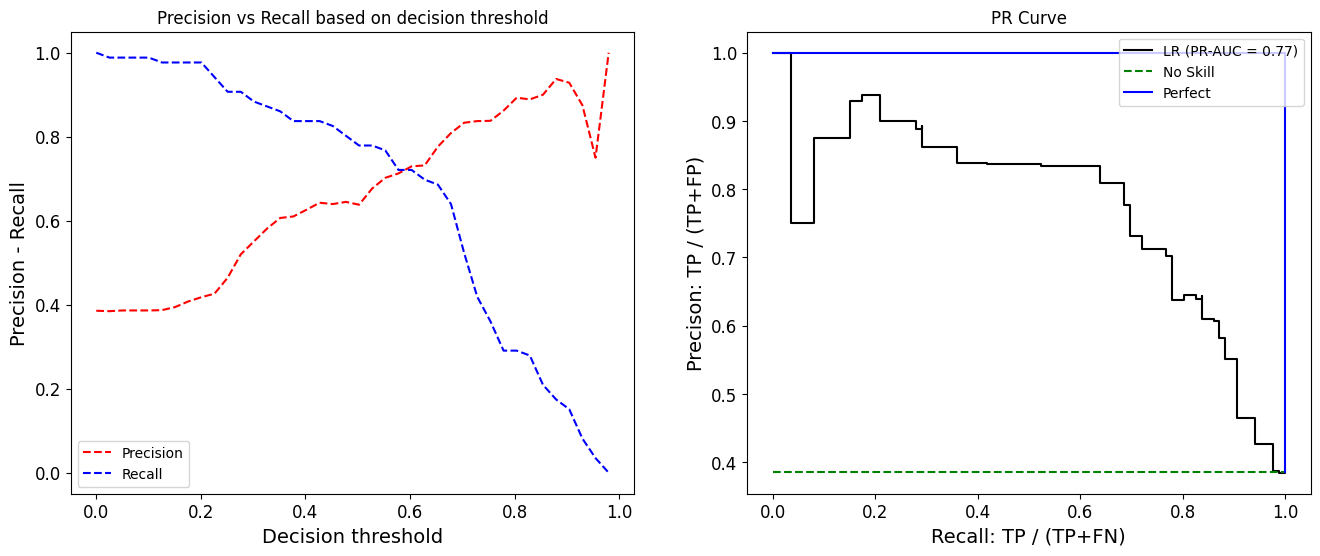

time: 679 ms (started: 2024-10-26 13:26:14 +00:00)


In [ ]:
ml.plot_precision_recall_curve(y_test, X_test, rs1)

Bu Precision-Recall eğrisi şu şekilde yorumlanabilir:

**Sol Grafik**: Bu grafik, threshold değiştikçe precision ve recall'un nasıl değiştiğini gösterir.

<font color="red">Precision</font>: Threshold arttıkça preciison genellikle artar çünkü model olumlu tahminlerine daha fazla güvenir. Ancak eşik değeri 1'e yaklaştıkça, olumlu tahminlerin sayısındaki azalma nedeniyle kesinlik düşebilir.

<font color="blue">Recall</font>: Threshold arttıkça recall azalma eğilimindedir. Bunun nedeni, threshold daha katı hale geldikçe (daha yüksek), daha az pozitif vakanın tahmin edilmesi ve bunun da daha fazla False Negatif'e yol açmasıdır.

Eğrilerin kesişme noktası (0,6 civarında) precision ile recall arasında bir dengeyi gösteriyor. Bu bölge etrafında bir threshold seçmeyi veya birini diğerine göre önceliklendirmeyi tercih edebiliriz.

**Sağ Grafik**: Bu grafik, farklı thresholdlar boyunca precison ve recall arasındaki dengeyi gösterir. Siyah çizgi modelimizin gerçek performansını temsil eder; eğrinin altındaki alan (AUC, burada 0.77) genel performansı yansıtır.

**Genel Yorum**: 0,77'lik PR AUC değeri, modelimizin precison ve recall'u arasında iyi bir dengeye sahip olduğunu ve rastgele şanstan daha iyi performans sergilediğini gösteriyor.

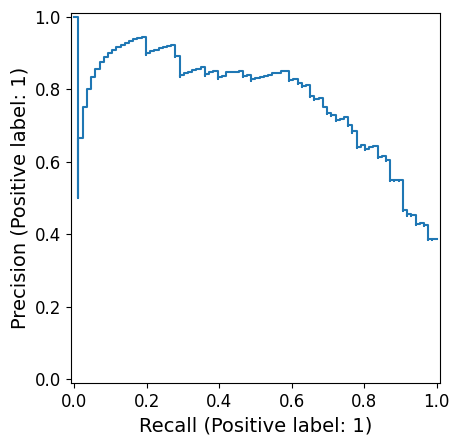

time: 238 ms (started: 2024-10-26 13:26:15 +00:00)


In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
pred_prob = rs1.best_estimator_.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
PrecisionRecallDisplay(precision, recall,pos_label=1).plot()

#### Gain ve Lift

In [ ]:
#best estimatör RidgeClassifer olup bunun da predict_proba'sı olmadığı için bunu şimdilik çalışıtrmıyoruz. istenirse 2. en iyi model için yapılabilir
#  ml.plot_gain_and_lift(hrs1.best_estimator_["clf"],X_test,y_test,pos_label=1)

time: 855 µs (started: 2024-10-26 13:53:01 +00:00)


### En güvenilir modeli kurmak

Not: Eğer işbirimi bizden en güvenilir modeli kurmamızı istiyorsa o zaman accuracy yerine log_loss'a bakarız. Şimdi direkt en düşük log-loss'u elde etmeyi hedefleyecek şekilde modelimizi kuralım(scoring'e neg_log_loss vereceğiz)

In [ ]:
%%time
params= [
    {
           'clf'               : [SGDClassifier(loss='log_loss',max_iter=mi,random_state=42)],
           'clf__alpha'        : [0.001, 0.002, 0.005],
           'clf__tol'          : [0.0005, 0.001,0.002,0.005],
           'clf__penalty'      : ['l1'],
           'clf__l1_ratio'     : [0.3, 0.5, 0.7],
           'clf__learning_rate': ['adaptive'],
           'clf__eta0'          : [0.005, 0.01, 0.02],
           'clf__early_stopping':[True,False],
           'clf__class_weight': ['balanced'],
           'ct__numerics__ouh': [OutlierHandler(featureindices=[0,3]),None], #Age ve Fare için, her ne kadar Fare'de LogTrans yapmış olsak da
           'ct__numerics__scl' : [StandardScaler()]
          }
]

rs_logloss = RandomizedSearchCV(estimator=pipe, param_distributions = params, cv = mycv, n_jobs=-1, verbose = 1,
                          scoring = 'neg_log_loss',error_score='raise',n_iter=100)
rs_logloss.fit(X_train, y_train)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits
CPU times: user 24.7 s, sys: 667 ms, total: 25.3 s
Wall time: 4min 27s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=1),
                   error_score='raise',
                   estimator=Pipeline(steps=[('log',
                                              FunctionTransformer(func=<function logTransformer at 0x7e7147611b40>,
                                                                  kw_args={'col_name': 'Fare'})),
                                             ('ct',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('nominals',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop...
                                         'clf__class_weight': ['balanced'],
                                         'clf__early_stopping': [True, False],
                                         'clf__eta0': [0.005, 0.01, 0.02],
                                         'clf__l1_ratio': [0.3, 0.5, 0.7],
                                         'clf__learning_rate': ['adaptive'],
                                         'clf__penalty': ['l1'],
                                         'clf__tol': [0.0005, 0.001, 0.002,
                                                      0.005],
                                         'ct__numerics__ouh': [OutlierHandler(featureindices=[0,
                                                                                              3]),
                                                               None],
                                         'ct__numerics__scl': [StandardScaler()]}],
                   scoring='neg_log_loss', verbose=1)

time: 4min 27s (started: 2024-10-26 13:26:15 +00:00)


In [ ]:
ml.gridsearch_to_df(rs_logloss)

,param_ct__numerics__scl,param_ct__numerics__ouh,param_clf__tol,param_clf__penalty,param_clf__learning_rate,param_clf__l1_ratio,param_clf__eta0,param_clf__early_stopping,param_clf__class_weight,param_clf__alpha,param_clf,mean_test_score,std_test_score
53,StandardScaler(),None,0.0005,l1,adaptive,0.7,0.02,False,balanced,0.001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",-0.451633,0.042714
24,StandardScaler(),None,0.0005,l1,adaptive,0.3,0.02,False,balanced,0.001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",-0.451633,0.042714
84,StandardScaler(),None,0.0005,l1,adaptive,0.5,0.02,False,balanced,0.002,"SGDClassifier(loss='log_loss', max_iter=4000, ...",-0.451745,0.041281
77,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0010,l1,adaptive,0.3,0.02,False,balanced,0.001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",-0.452186,0.042767
14,StandardScaler(),"OutlierHandler(featureindices=[0, 3])",0.0010,l1,adaptive,0.5,0.02,False,balanced,0.001,"SGDClassifier(loss='log_loss', max_iter=4000, ...",-0.452186,0.042767


time: 37.3 ms (started: 2024-10-26 13:30:43 +00:00)


In [ ]:
rs_logloss.best_score_

-0.4516333807559988

time: 2.51 ms (started: 2024-10-26 13:30:43 +00:00)


In [ ]:
#lets import accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rs_logloss.predict(X_test))

0.7757847533632287

time: 21 ms (started: 2024-10-26 13:30:43 +00:00)


### Feature Importance

Normalde, hangi feature'un en çok katkısı olduğunu katsayılar üzerinden anlayabiliyoruz. Tabi yukarıda birkçaz kez ifade ettiğim gibi, multicollinearity olmadığından emin olmak lazım, yoksa bu katsayılar yanlış yorumlanabilir.

Bunun için coef\_ attribute'üne bakmak gerekir. (Genel kültür: bir attribute'ün sonunda "_" varsa, bu bu attribute'ün fit sonrasında oluştuğu anlamına gelir.)

In [ ]:
hrs1.best_estimator_["clf"]

RidgeClassifier(alpha=0.001, class_weight='balanced', random_state=42,
                solver='cholesky')

time: 6.73 ms (started: 2024-10-26 13:30:43 +00:00)


In [ ]:
hrs1.best_estimator_["clf"].coef_[0]

array([-0.94590509,  0.11997351, -0.09282952,  0.21395336, -0.3194661 ,
       -0.26057368,  0.08512421,  0.0736427 ,  0.07574321, -0.2388772 ,
       -1.04697817, -0.37509795, -0.17225053, -0.10040772, -0.02086392,
        0.11593916, -0.20351425])

time: 4.65 ms (started: 2024-10-26 13:30:43 +00:00)


Burada önemli olan bir detay var, o da bu katsayıların one-hot-encoding yapıldıktan sonra elde edilen feature sayısı kadar olduğudur, ilk haldedeki feature sayısı kadar değil.
Toplam etkiyi görmek için bunların mutlak değerlerinin toplamına veya ortalamasına bakılabilir.

In [ ]:
best_model = hrs1.best_estimator_
# ColumnTransformer’dan sonra oluşan sütun isimlerini alalım
# OneHotEncoder kullandığımız için sütun isimleri encoder’da saklanıyor
ohe = best_model.named_steps['ct'].named_transformers_['nominals'].named_steps['ohe']
ohe_feature_names = ohe.get_feature_names_out(list(noms))

feature_names = ohe_feature_names.tolist() + nums
coefficients = best_model.named_steps['clf'].coef_


importance_dict = {}
for orig_feat in list(noms) + nums:
    orig_indices = [i for i, col in enumerate(feature_names) if col.startswith(orig_feat)]
    importance_dict[orig_feat] = np.sum(np.abs(coefficients[:, orig_indices]))

importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
print(importance_df.sort_values(by='Importance', ascending=False))

     Feature  Importance
2  CabinGrup    2.475503
0        Sex    0.945905
1   Embarked    0.426756
3        Age    0.172251
6       Fare    0.115939
4      SibSp    0.100408
5      Parch    0.020864
time: 8.11 ms (started: 2024-10-26 13:30:43 +00:00)


## Modeli kaydetme

Modelimizden memnun olduğumuz noktada onu sonraki kullanımlar için kaydedelim.

In [ ]:
import pickle

with open('hrs1.pkl', 'wb') as f:
  pickle.dump(hrs1, f)

# To load the model later:
# with open('hrs1.pkl', 'rb') as f:
#   loaded_hrs1 = pickle.load(f)

time: 4.06 ms (started: 2024-10-26 13:34:42 +00:00)


In [ ]:
#nolur nolmaz diye X_train v.s de kaydedelim
for i, obj in enumerate([X_train, X_test, y_train, y_test]):
  filename = os.path.join(f"{type(obj).__name__}_{i}.pkl") # use f-string and index to create unique filenames
  with open(filename, 'wb') as f:
    pickle.dump(obj, f)

time: 2.69 ms (started: 2024-10-26 13:38:59 +00:00)


# Kaynaklar

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
- https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook
- https://www.analyticsvidhya.com/blog/2021/07/titanic-survival-prediction-using-machine-learning/
- https://becominghuman.ai/titanic-survival-dataset-part-2-2-logistic-regression-7ebe9e30bf54